In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Data cleaning

In [3]:
df = pd.read_csv('who_life_exp.csv')
df.head()

country country_code  region  year  life_expect  life_exp60  \
0  Angola          AGO  Africa  2000     47.33730    14.73400   
1  Angola          AGO  Africa  2001     48.19789    14.95963   
2  Angola          AGO  Africa  2002     49.42569    15.20010   
3  Angola          AGO  Africa  2003     50.50266    15.39144   
4  Angola          AGO  Africa  2004     51.52863    15.56860   

   adult_mortality  infant_mort  age1-4mort  alcohol  ...  che_gdp    une_pop  \
0         383.5583     0.137985    0.025695  1.47439  ...  1.90860  16395.473   
1         372.3876     0.133675    0.024500  1.94025  ...  4.48352  16945.753   
2         354.5147     0.128320    0.023260  2.07512  ...  3.32946  17519.417   
3         343.2169     0.122040    0.021925  2.20275  ...  3.54797  18121.479   
4         333.8711     0.115700    0.020545  2.41274  ...  3.96720  18758.145   

   une_infant  une_life  une_hiv  une_gni  une_poverty  une_edu_spend  \
0       122.2    46.522      1.0   2530.0         32.3        2.60753   
1       118.9    47.059      1.1   2630.0          NaN            NaN   
2       115.1    47.702      1.2   3180.0          NaN            NaN   
3       110.8    48.440      1.3   3260.0          NaN            NaN   
4       106.2    49.263      1.3   3560.0          NaN            NaN   

   une_literacy  une_school  
0           NaN         NaN  
1      67.40542         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

[5 rows x 32 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [5]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop hostpital column because there is 96% of missing values in that column.
We decided to drop the UNESCO datasets because there are overlapping predictors with the predictors in GHO datasets. Another reason we choose GHO datasets over UNESCO datasets is because some of the variables in UNESCO has more than 70% null data, eg une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO datasets.


In [6]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop 'hostpital' column because there is 96% of missing values in that column. 
We also dropped 'country code' column because 'country' column itself is enough for reference.

In [7]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [8]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

adult_mortality  infant_mort  age1-4mort
0         383.5583     0.137985    0.025695
1         372.3876     0.133675    0.024500
2         354.5147     0.128320    0.023260
3         343.2169     0.122040    0.021925
4         333.8711     0.115700    0.020545

The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [9]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val

In [10]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)

In [11]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [12]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Serbia          6
Montenegro      6
Canada          5
Afghanistan     5
Name: country, dtype: int64

In [13]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

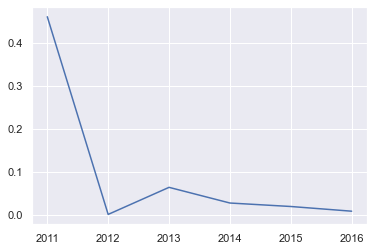

In [14]:
plt.plot('year', 'alcohol', data = sudan_df)

In [15]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

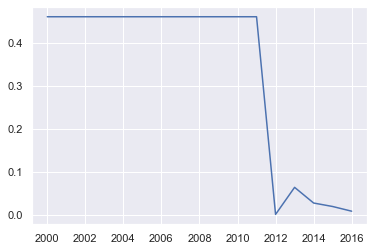

In [16]:
plt.plot('year', 'alcohol', data = sudan_df)

In [17]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

In [18]:
sudan_df.bfill(inplace = True)

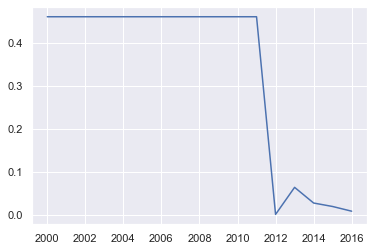

In [19]:
plt.plot('year', 'alcohol', data = sudan_df)

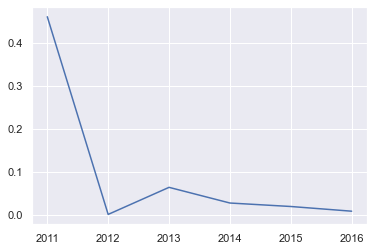

In [20]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

In [21]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

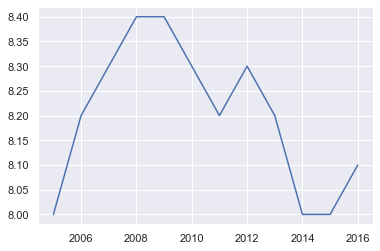

In [22]:
plt.plot('year', 'alcohol', data = canada_df)

In [23]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

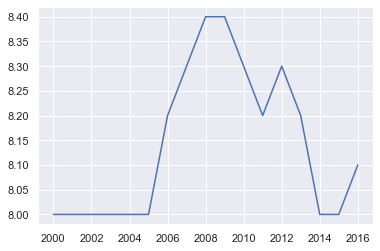

In [24]:
plt.plot('year', 'alcohol', data = canada_df)

In [25]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

In [26]:
canada_df.ffill(inplace = True)

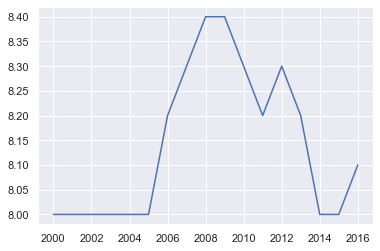

In [27]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

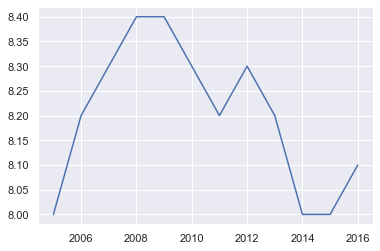

In [28]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

In [29]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])

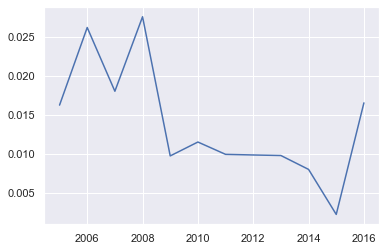

In [30]:
plt.plot('year', 'alcohol', data = afg_df)

In [31]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

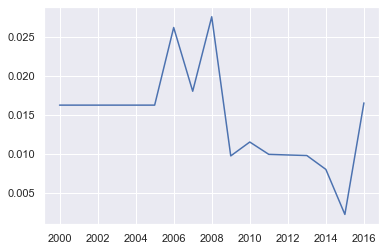

In [32]:
plt.plot('year', 'alcohol', data = afg_df)

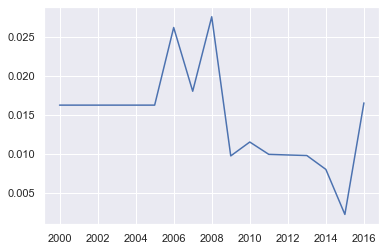

In [33]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

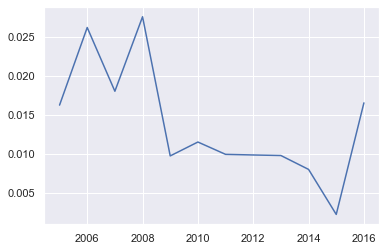

In [34]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Analysis : It is obvious that no trend can be observed from the above plot as the years given to observe the trend of the data are too few and also the missing values are usually appear to be missing in consecutive years. In addition to this, we realisedt that forward filling is not working in this case and this indicates that backward filling might also not working for other cases. Thus, interpolation with linear method and both directin will be the better method to fill in the missing values as it is able to fill in missing values which appears to be in the recent years or in the earliest year. Furthermore, if the missing values are more than 10 for a country, we tend not to fill in the null values as too few of available datas to be used as reference for filling in the missing values and might contribute to low accuracy. 

In [35]:
countries = df[df['alcohol'].isna()]['country'].unique().tolist()

In [36]:
for country in countries:
    if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc('alcohol')
        alcohol_df = pd.DataFrame(df.iloc[row_index, col_index])
        alcohol_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = alcohol_df

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19200/3723828569.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:


In [37]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               28
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Define a method to fill the null values with the condition that if missing values for one country are more than 10 then the null values will be retained

In [38]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [39]:
df[df['bmi'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [40]:
df[df['age5-19thinness'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [41]:
df[df['age5-19obesity'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

To check if the fill_na method works well on other datasets as well.

In [42]:
null_df = pd.DataFrame(df[df['hepatitis'].isna()]['country'].value_counts())
pd.set_option('display.max_rows',null_df.shape[0]+1)
print(null_df)


                                                    country
Slovenia                                                 17
United Kingdom of Great Britain and Northern Ir...       17
Switzerland                                              17
Japan                                                    17
Finland                                                  17
Iceland                                                  17
Hungary                                                  17
Norway                                                   17
Denmark                                                  17
South Sudan                                              15
Equatorial Guinea                                        14
Somalia                                                  13
Haiti                                                    13
Netherlands                                              11
Sweden                                                   11
Namibia                                 

In [43]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])

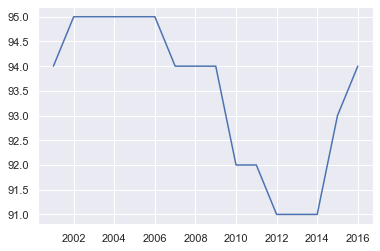

In [44]:
plt.plot('year', 'hepatitis', data = aus_df)

In [45]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

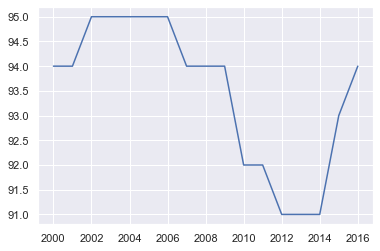

In [46]:
plt.plot('year', 'hepatitis', data = aus_df)

In [47]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])

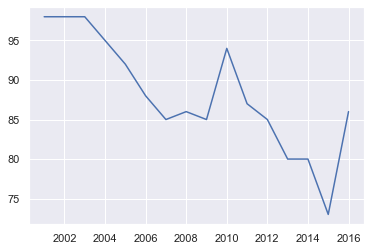

In [48]:
plt.plot('year', 'hepatitis', data = pnm_df)

In [49]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

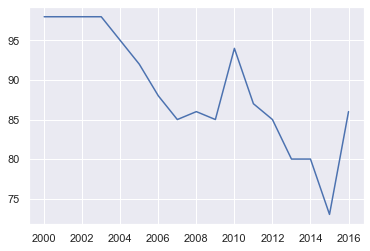

In [50]:
plt.plot('year', 'hepatitis', data = pnm_df)

Conclusion : The fill_na method can be used thus we will just generate a list of variables with null value and fill in the null values if condition is met

In [51]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [52]:
for country in countries:
    fill_na('hepatitis', country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19200/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [53]:
null_pred = df.columns[df.isna().any()].tolist()
null_pred.remove('alcohol')
null_pred.remove('bmi')
null_pred.remove('age5-19thinness')
null_pred.remove('age5-19obesity')
null_pred.remove('hepatitis')

In [54]:
null_pred

['measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [55]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19200/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [56]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64

# Exploratory Analysis

In [57]:
df.dtypes



country              object
region               object
year                  int64
life_expect         float64
life_exp60          float64
adult_mort_rate     float64
infant_mort_rate    float64
age1-4_mort_rate    float64
alcohol             float64
bmi                 float64
age5-19thinness     float64
age5-19obesity      float64
hepatitis           float64
measles             float64
polio               float64
diphtheria          float64
basic_water         float64
doctors             float64
gni_capita          float64
gghe-d              float64
che_gdp             float64
une_pop             float64
une_hiv             float64
dtype: object

# Outliers


In [58]:
df.shape

(3111, 23)

creating a copy of cleaned data frame

In [59]:
new_df = pd.DataFrame(df)
new_df.info()
new_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           3111 non-null   object 
 1   region            3111 non-null   object 
 2   year              3111 non-null   int64  
 3   life_expect       3111 non-null   float64
 4   life_exp60        3111 non-null   float64
 5   adult_mort_rate   3111 non-null   float64
 6   infant_mort_rate  3111 non-null   float64
 7   age1-4_mort_rate  3111 non-null   float64
 8   alcohol           3083 non-null   float64
 9   bmi               3077 non-null   float64
 10  age5-19thinness   3077 non-null   float64
 11  age5-19obesity    3077 non-null   float64
 12  hepatitis         2881 non-null   float64
 13  measles           3100 non-null   float64
 14  polio             3100 non-null   float64
 15  diphtheria        3100 non-null   float64
 16  basic_water       3100 non-null   float64


(3111, 23)

Dropped the categorical features in order to analyse numeric features first

In [60]:

df_numeric = df.drop(labels= ['country','region','year'],axis=1)
df_numeric.info()
df_numeric.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   life_expect       3111 non-null   float64
 1   life_exp60        3111 non-null   float64
 2   adult_mort_rate   3111 non-null   float64
 3   infant_mort_rate  3111 non-null   float64
 4   age1-4_mort_rate  3111 non-null   float64
 5   alcohol           3083 non-null   float64
 6   bmi               3077 non-null   float64
 7   age5-19thinness   3077 non-null   float64
 8   age5-19obesity    3077 non-null   float64
 9   hepatitis         2881 non-null   float64
 10  measles           3100 non-null   float64
 11  polio             3100 non-null   float64
 12  diphtheria        3100 non-null   float64
 13  basic_water       3100 non-null   float64
 14  doctors           2216 non-null   float64
 15  gni_capita        3004 non-null   float64
 16  gghe-d            3043 non-null   float64


(3111, 20)

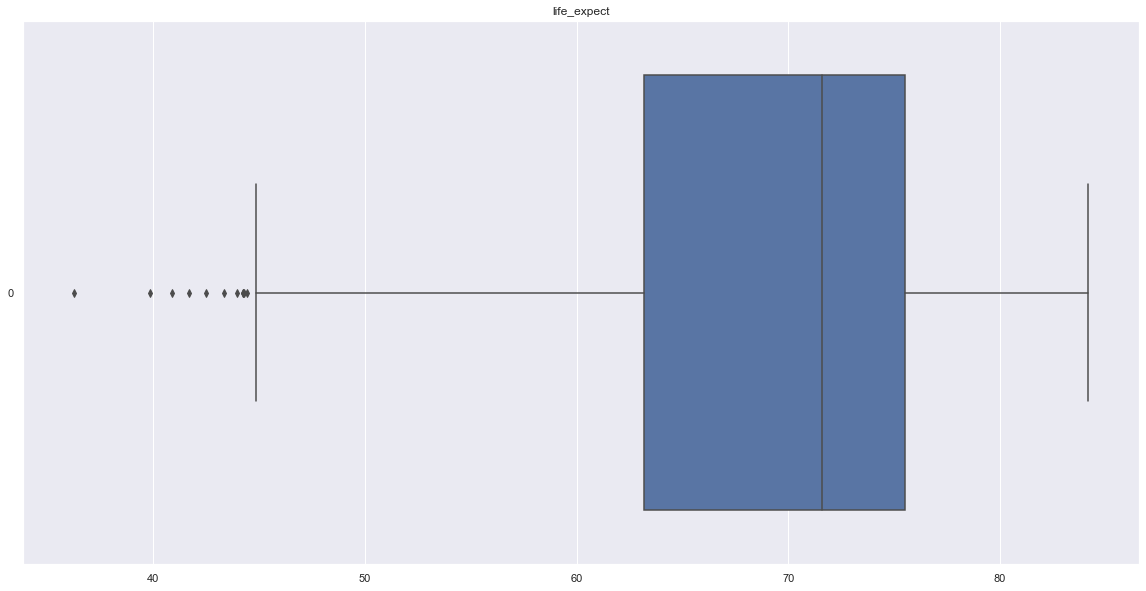

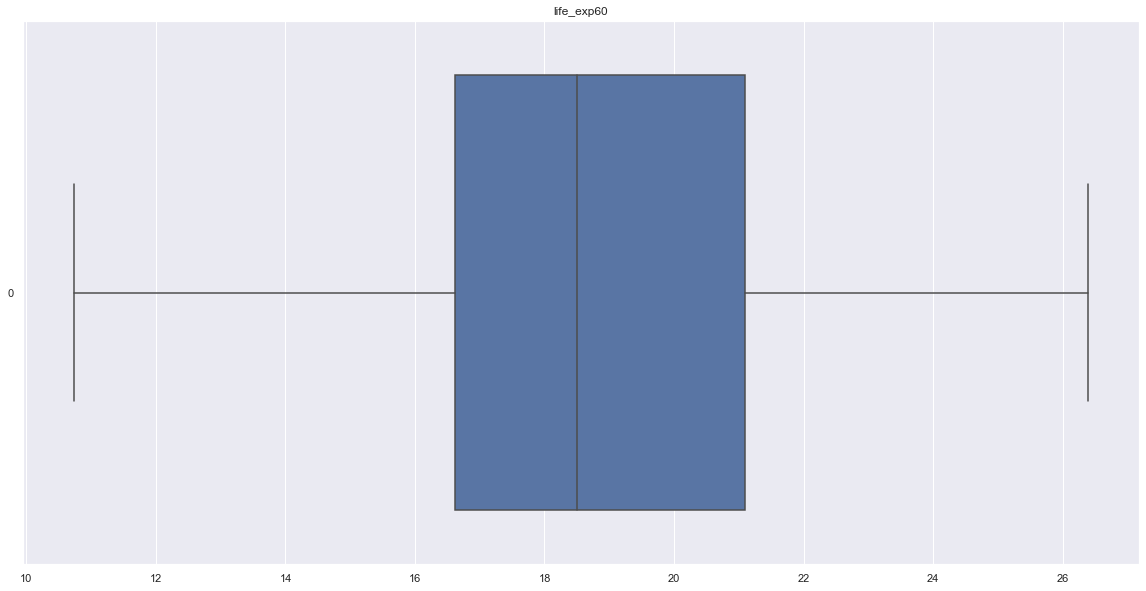

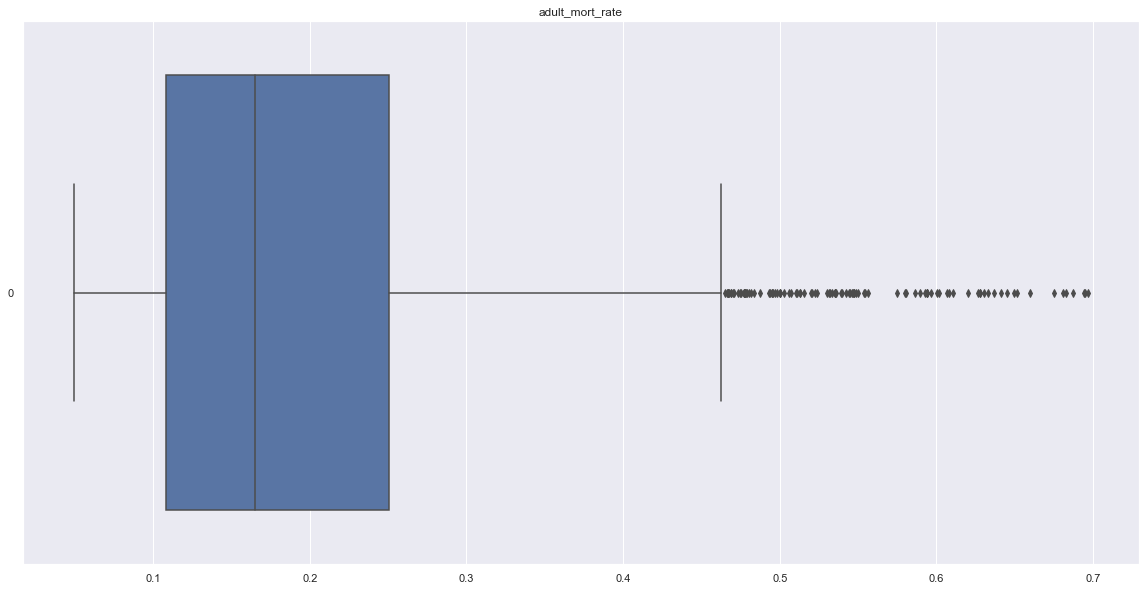

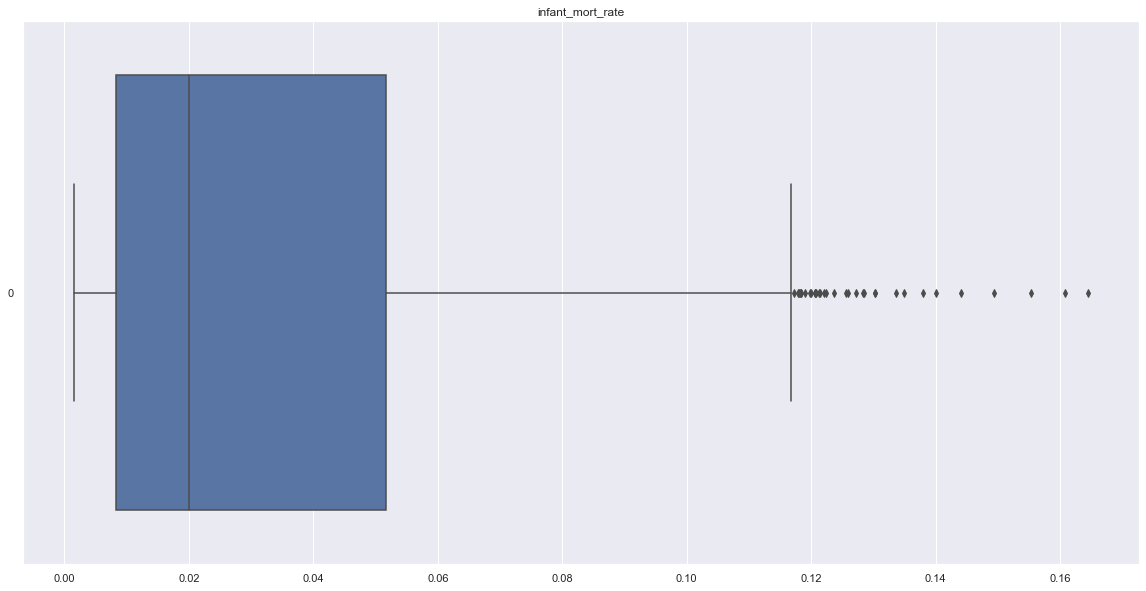

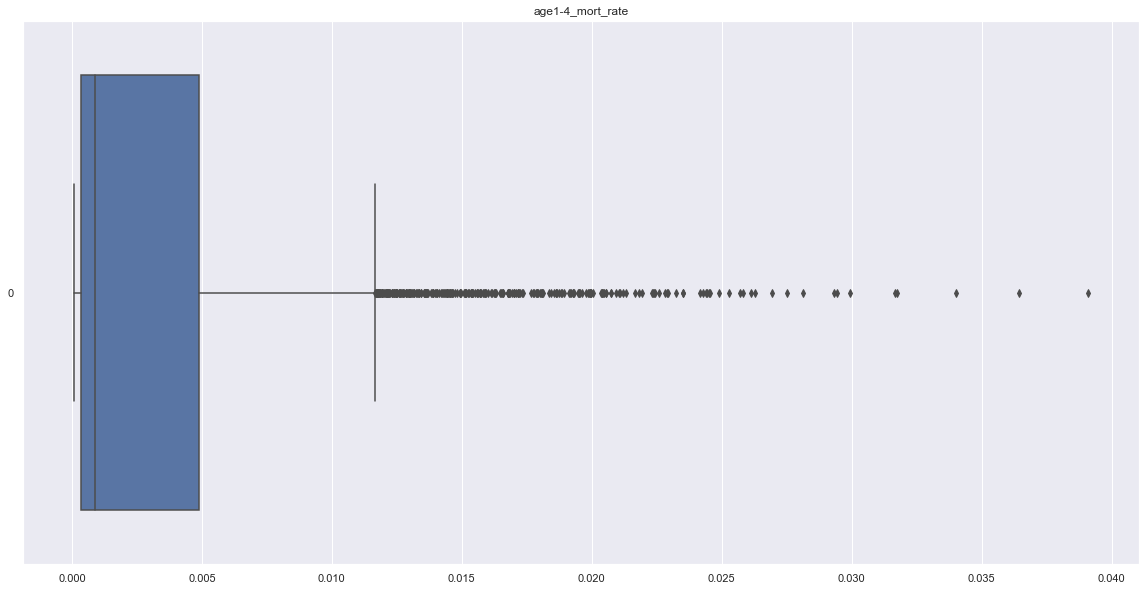

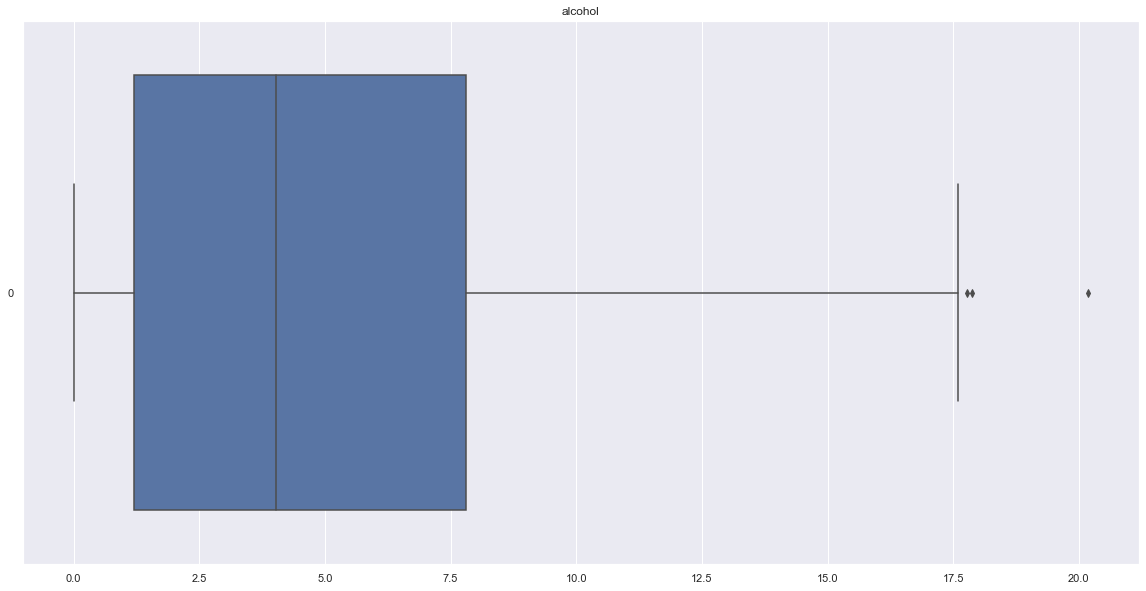

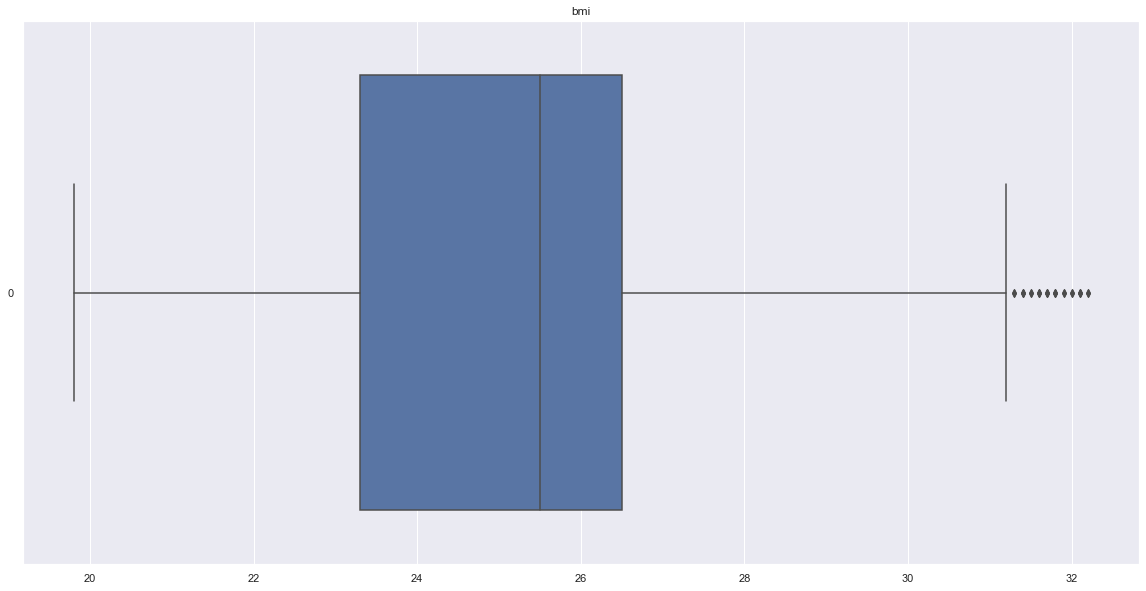

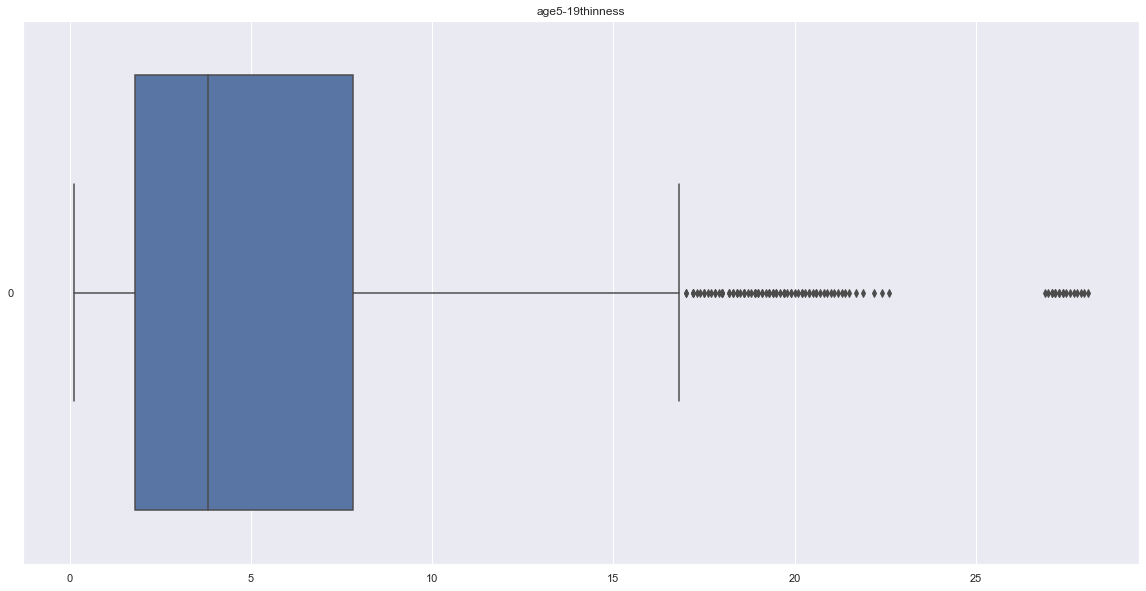

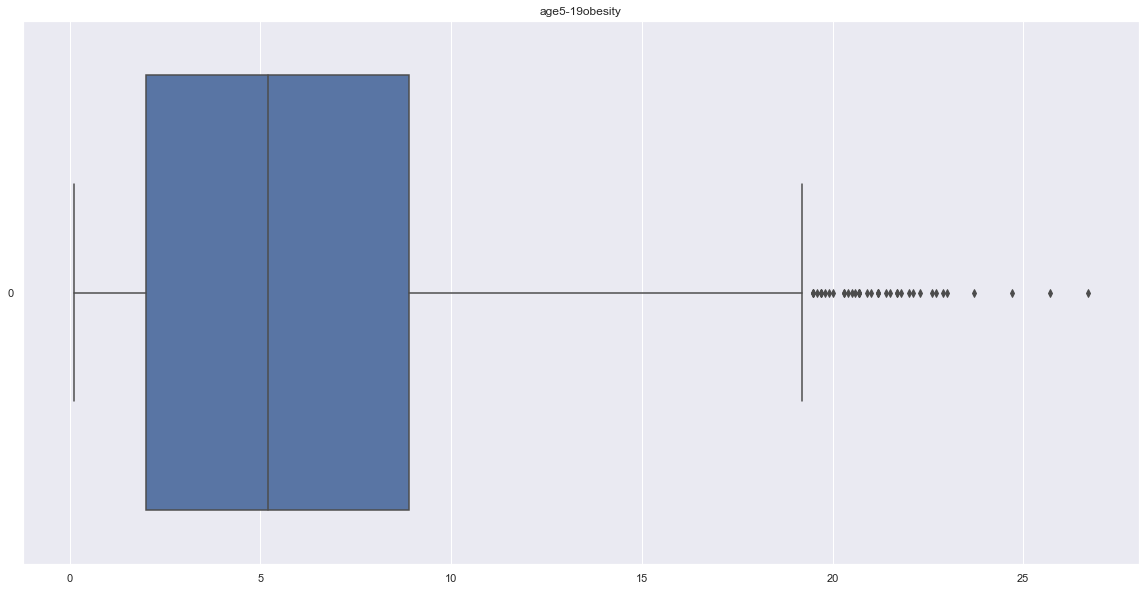

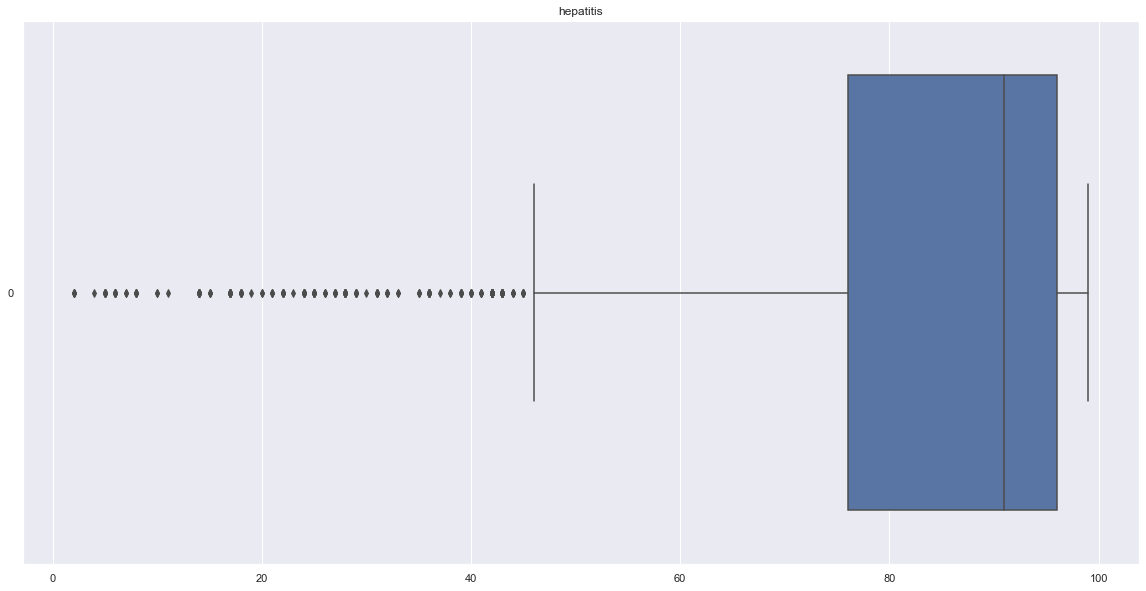

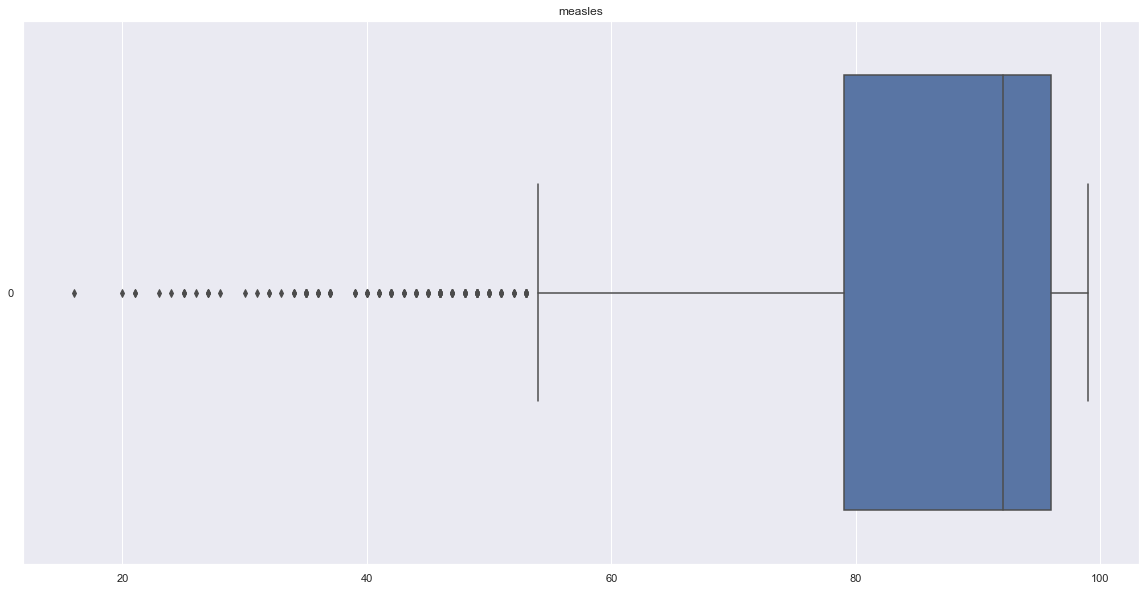

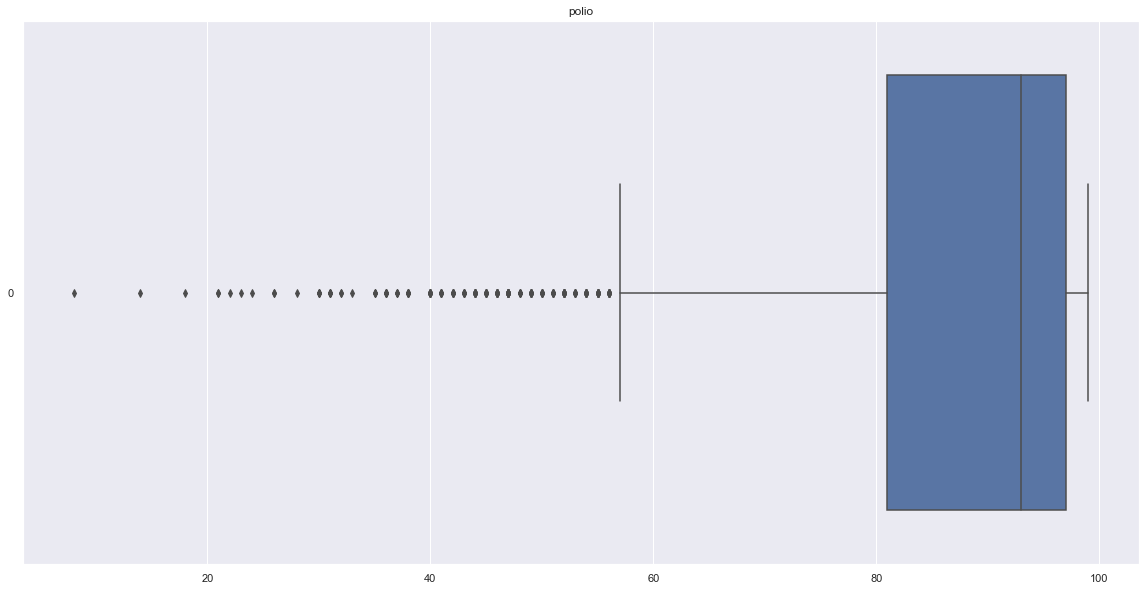

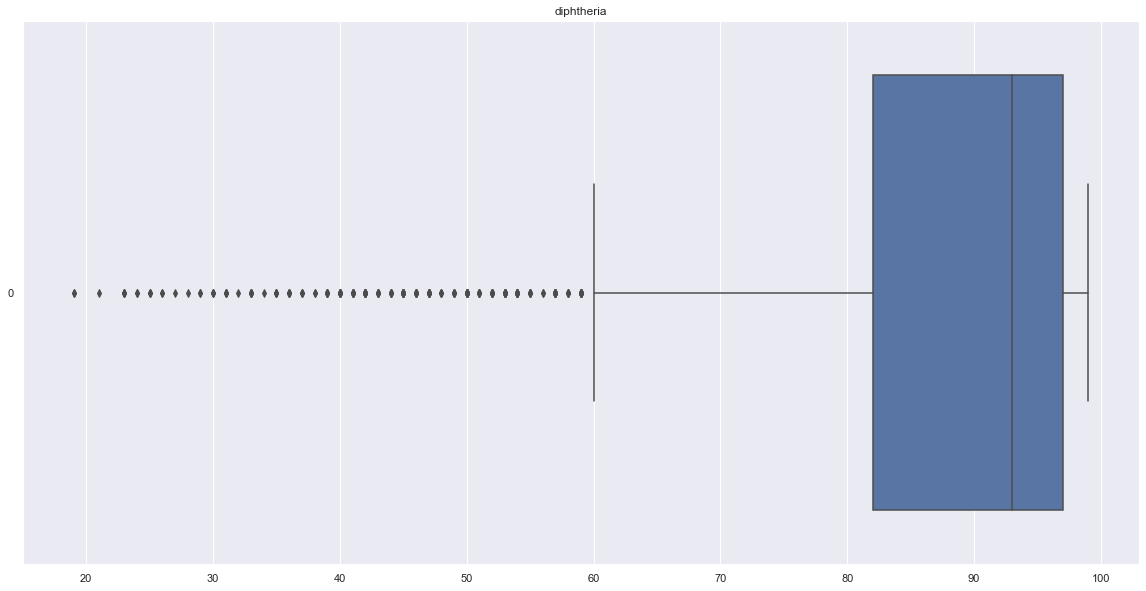

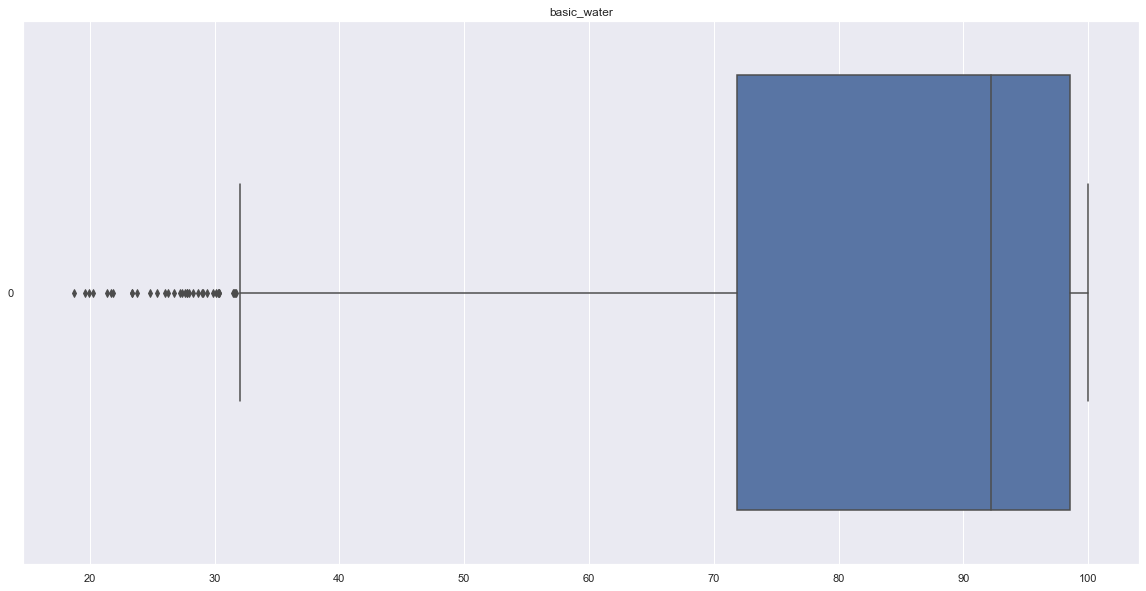

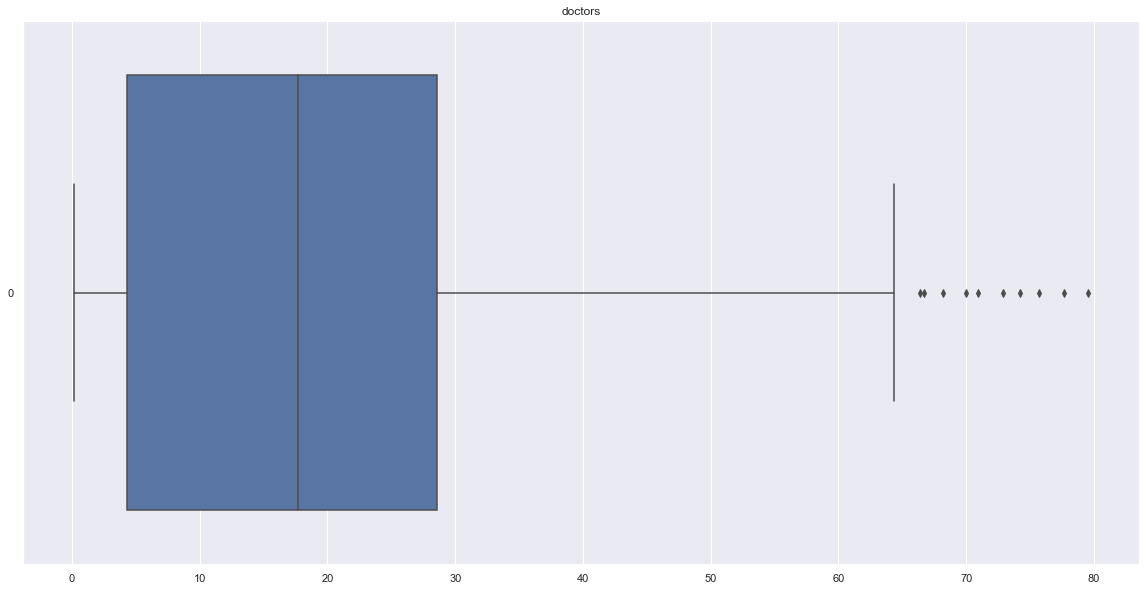

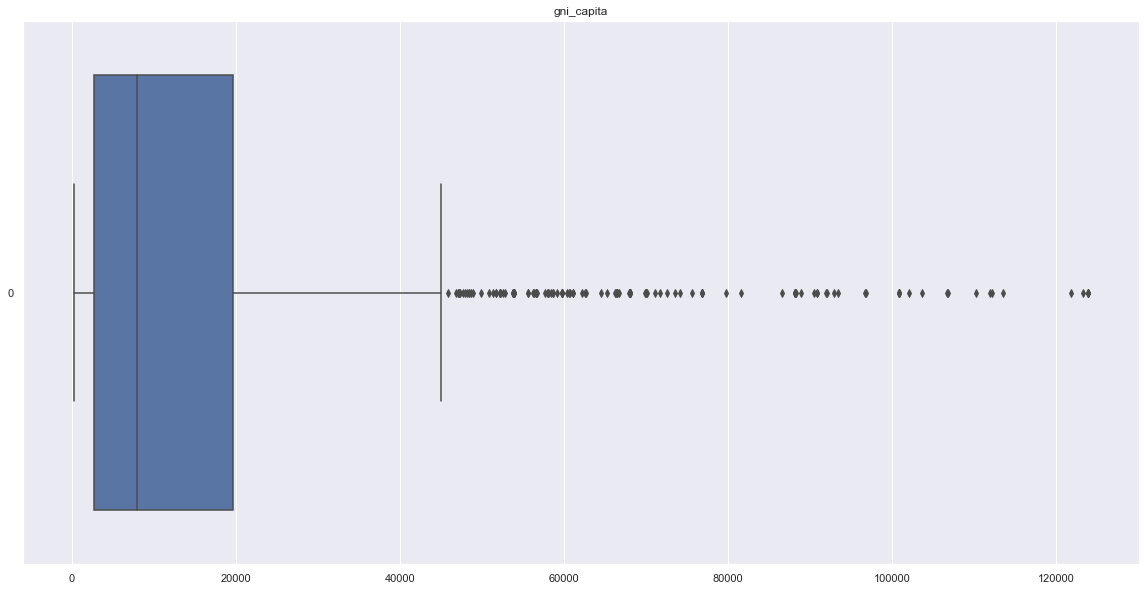

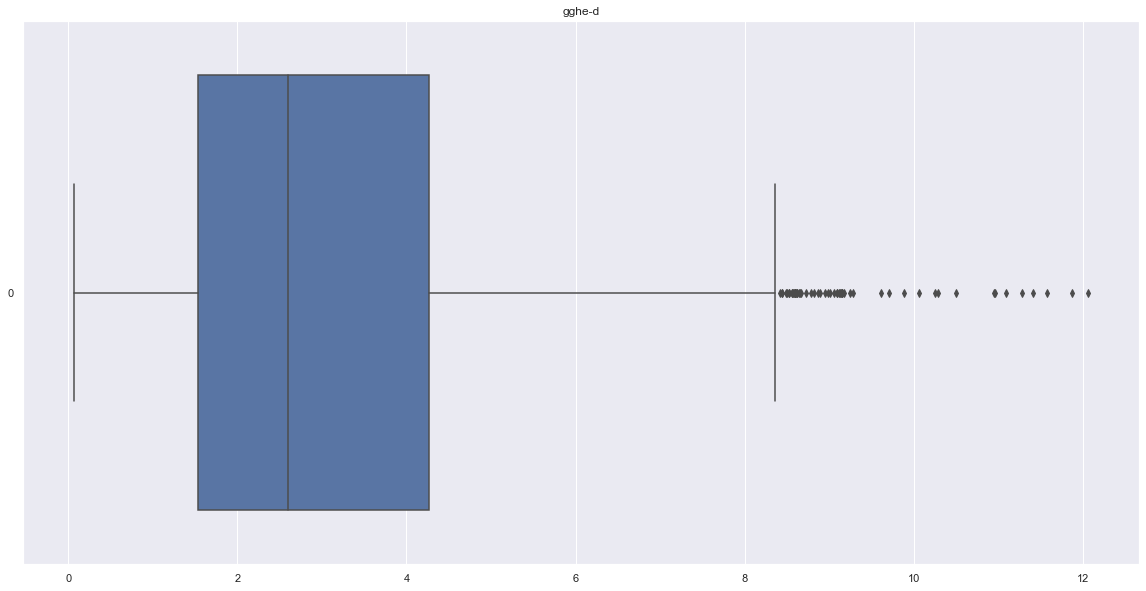

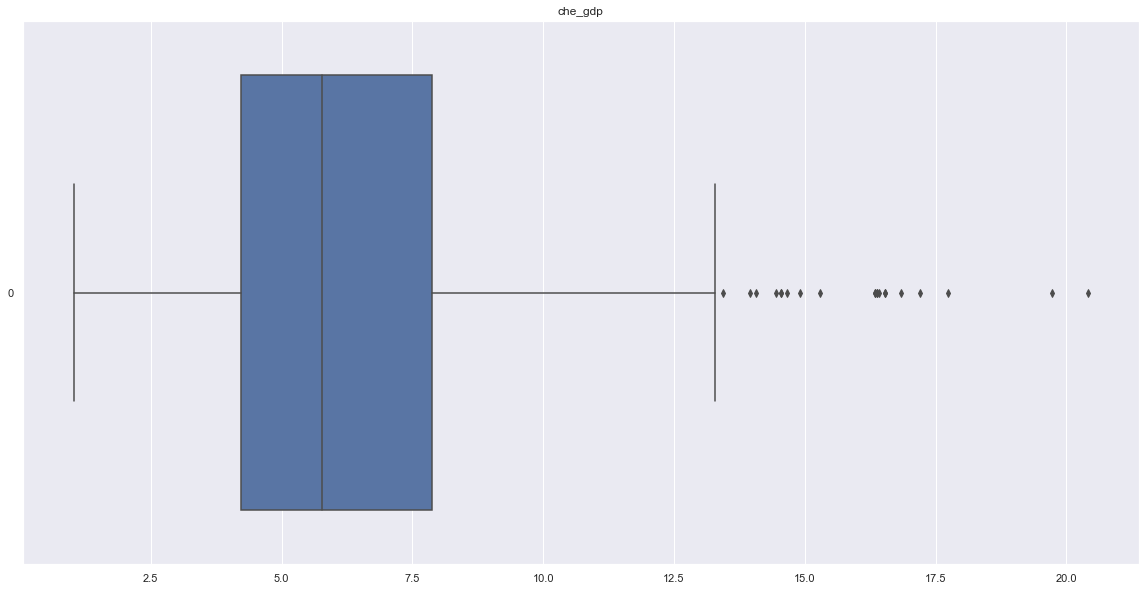

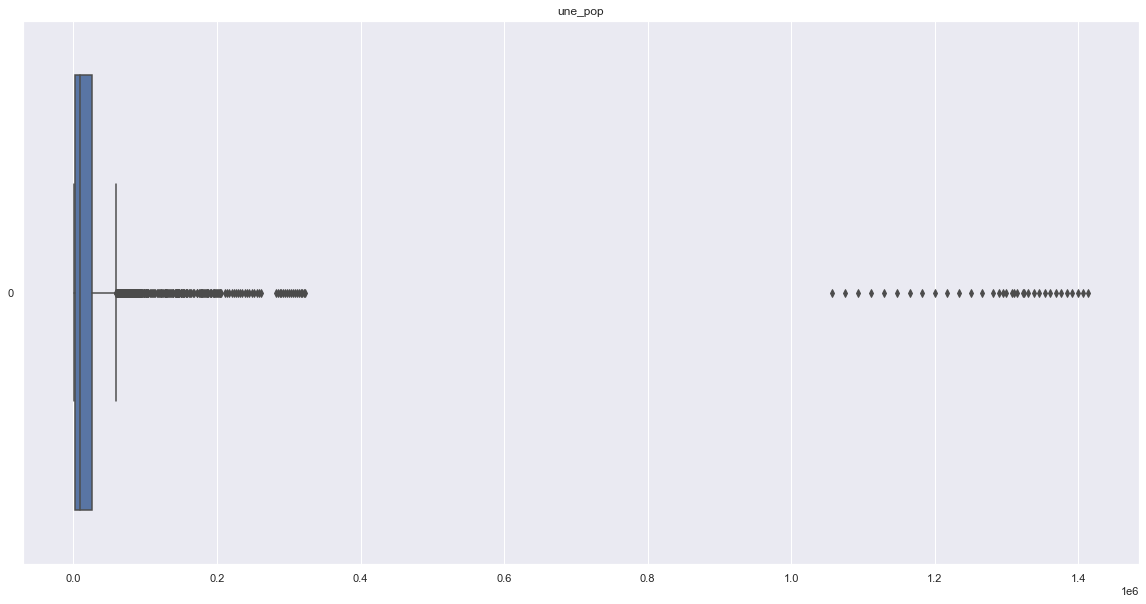

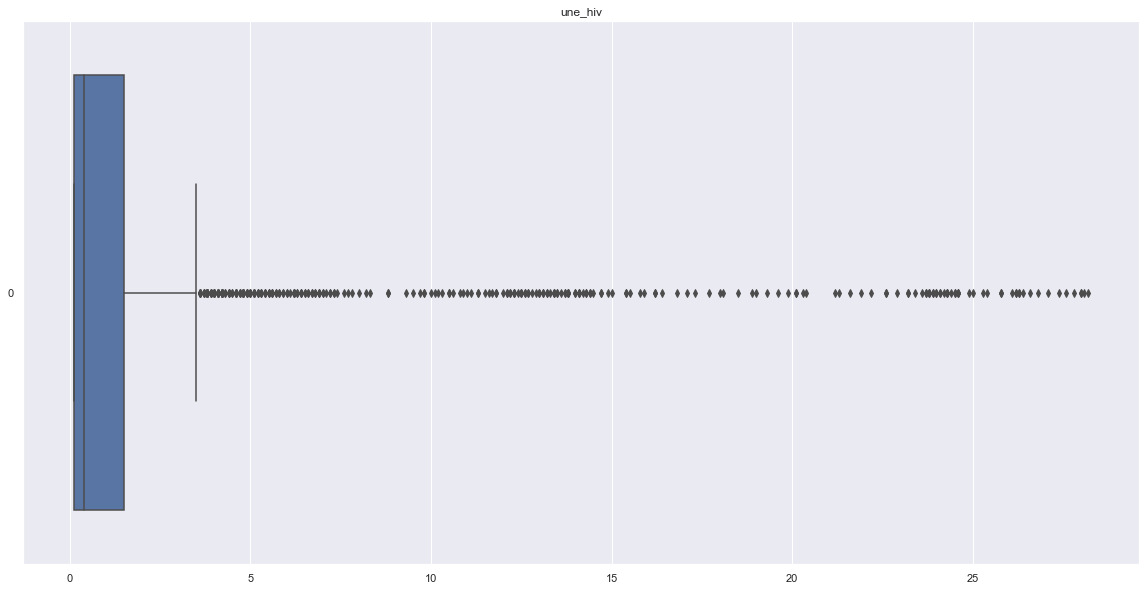

In [61]:
for var in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.boxplot(data = df_numeric[var], orient = "h").set_title(var)

In [62]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
outlier = ((df_numeric < (Q1 - 1.5 * (Q3 - Q1))) | (df_numeric > (Q3 + 1.5 * (Q3 - Q1))))
outlier.sum()

life_expect          11
life_exp60            0
adult_mort_rate     102
infant_mort_rate     33
age1-4_mort_rate    271
alcohol               3
bmi                  25
age5-19thinness      92
age5-19obesity       40
hepatitis           235
measles             164
polio               203
diphtheria          244
basic_water          35
doctors              10
gni_capita          141
gghe-d               55
che_gdp              21
une_pop             365
une_hiv             309
dtype: int64

une_pop has the greatest number of outliers followed by une_hiv. life_exp60 has the lowest amount of outliers followed by alcohol.

# Multivariate exploration 


In [63]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [64]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [65]:
region_names = new_df['region'].unique()
#region_names
for region in region_names:
    fig = px.line(pd.DataFrame(new_df[new_df['region']==region]), x="year", y="life_expect", title='Life expectancy of countries in ' +region + ' over the years',color='country')
    fig.show()
    #df_africa = pd.DataFrame(new_df[new_df['region']=="Africa"])
#df_africa

# <span style='background: Yellow'>General trends in each region</span>


From the mean and line graphs we can see the average life expectancies of countries in the 6 regions are different. Our aim is to find out why the life expectancies differ in each region and how we can further improve life expectancies in those regions that are lower. 

The average life expectancy in Africa is 57 years which is the lowest compared to other regions. The region with the highest average life expectancy is Europe which is 75 years. Hence, we want to find out what causes the life expectancy be so drastically different and whether the variables affecting life expectancy are different in different regions. 


From the line graphs above, the life expectancies of most countries in the different regions generally increased over the years.

However, there are some sudden drops in life expectancy in Sri-Lanka in 2004, in Myanmar in 2008, in Haiti in 2010 and in the Syrian Arab Republic in 2014.

Upon further research, we found that the sudden drop in life expectancy was due natural disasters and tragedies. In 2004 a tsunami occurred in Sri Lanka, cyclone Nargis struck Myanmar in 2008, a 7.0 magnitude earthquake occured in Haiti in 2010 and the Syrian Arab Republic was engaged in the syrian war in 2014.

Something to note is that the features do not have a cause and effect relationship with life expectancy as there are many unprecedented circumstances that could alter life expectancy. Hence, our solutions to increase the life expectancy of a region may not always be accurate due to the natural disasters which would be a limitation to our solution.

# Global 

We are going to find the top 5 predictors of LE globally first

In [72]:
print(df_numeric.corr())


                  life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
life_expect          1.000000    0.886159        -0.946419         -0.930113   
life_exp60           0.886159    1.000000        -0.775321         -0.769839   
adult_mort_rate     -0.946419   -0.775321         1.000000          0.813210   
infant_mort_rate    -0.930113   -0.769839         0.813210          1.000000   
age1-4_mort_rate    -0.864414   -0.661082         0.756230          0.909032   
alcohol              0.402975    0.465281        -0.250410         -0.448747   
bmi                  0.597996    0.458839        -0.517095         -0.641874   
age5-19thinness     -0.565396   -0.556536         0.455205          0.578230   
age5-19obesity       0.621000    0.547764        -0.571792         -0.602402   
hepatitis            0.398373    0.299663        -0.326215         -0.470327   
measles              0.640817    0.505314        -0.526452         -0.720781   
polio                0.646339    0.50197

<AxesSubplot:>

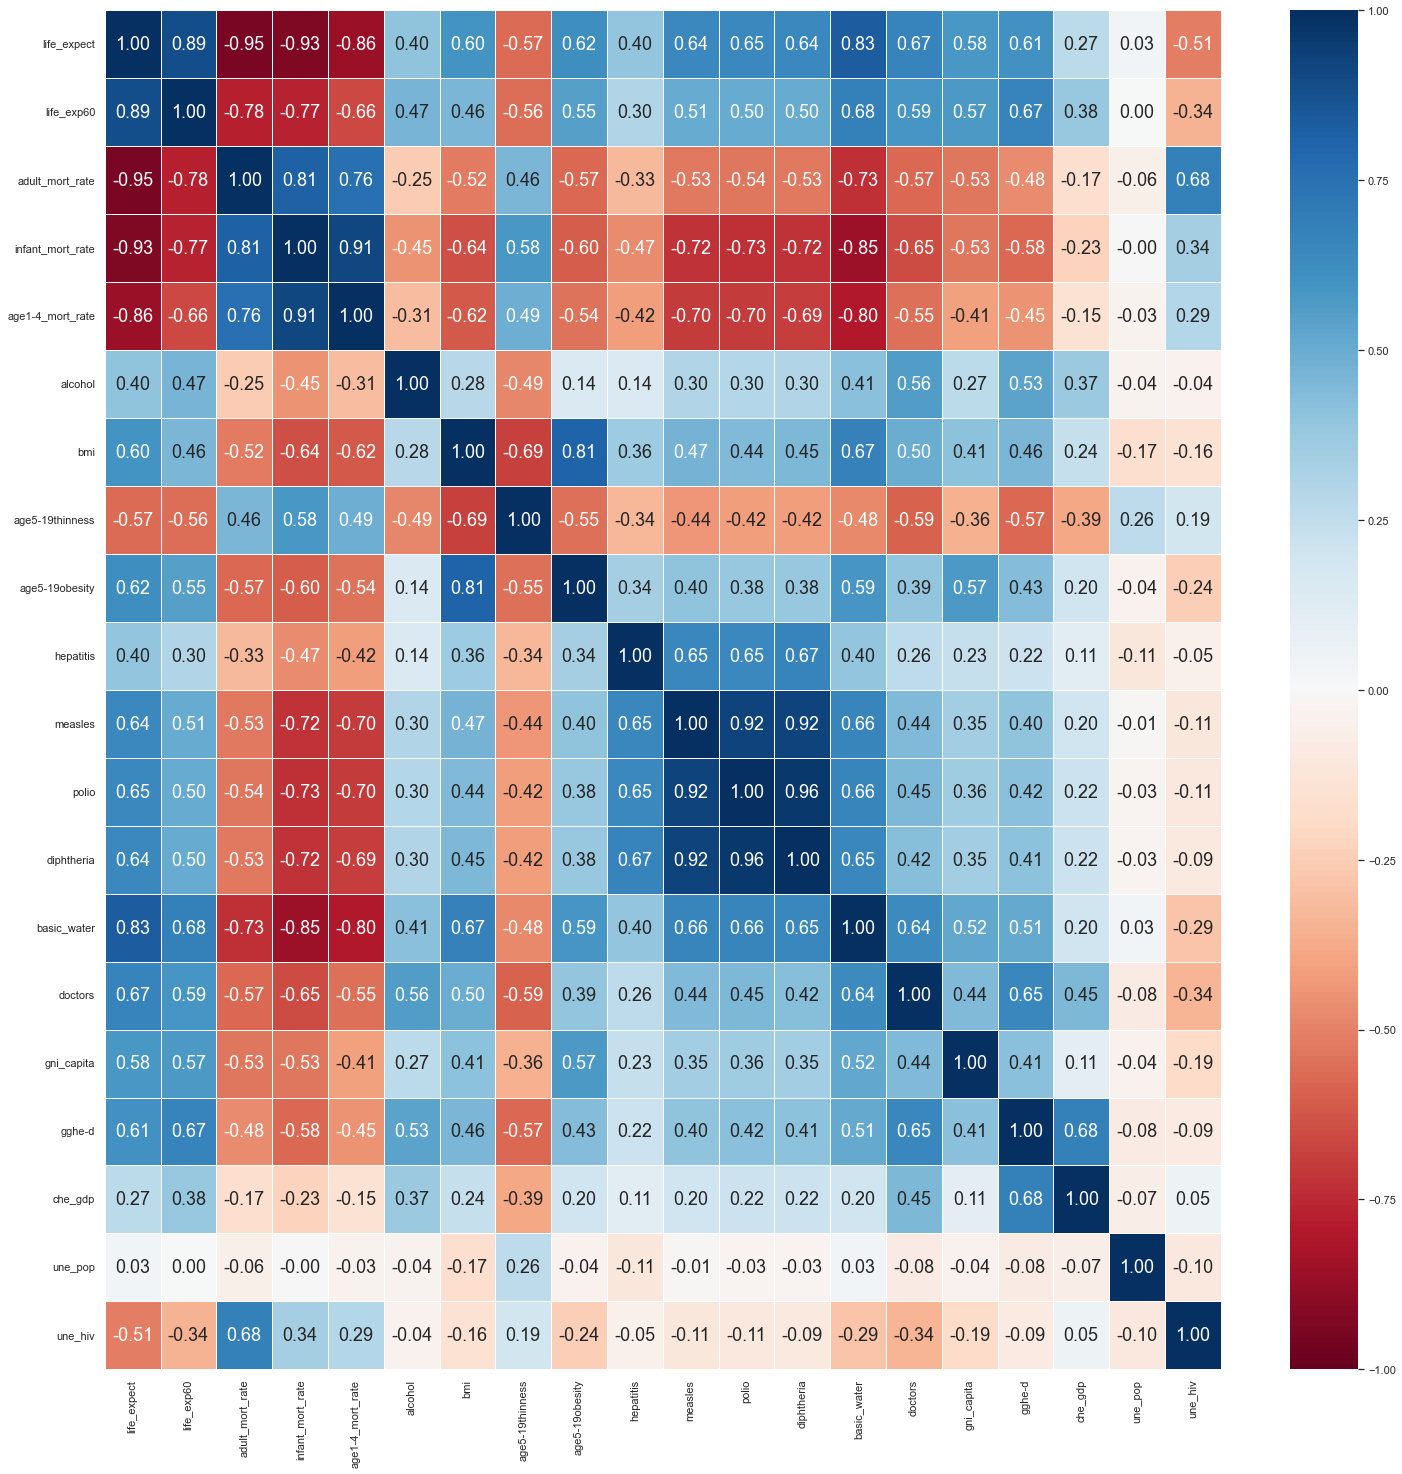

In [73]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(25, 25))
sb.heatmap(df_numeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

compare 2 variables using jointplot in order to see which factor is the most significant

# Comparing features with life_expect

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19200/2259564281.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 1440x720 with 0 Axes>

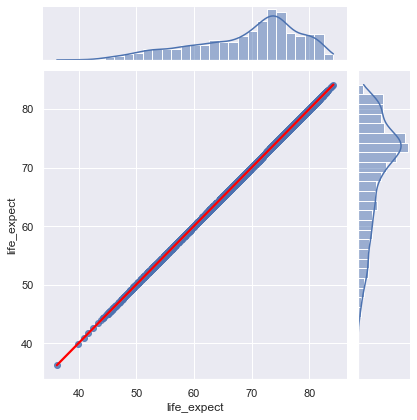

<Figure size 1440x720 with 0 Axes>

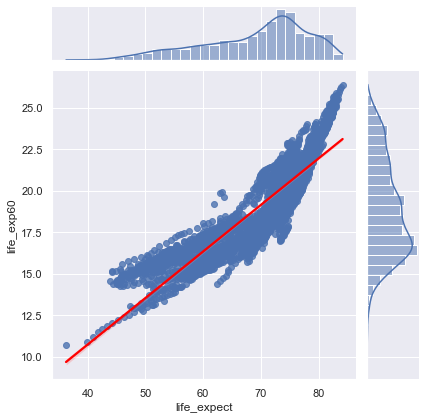

<Figure size 1440x720 with 0 Axes>

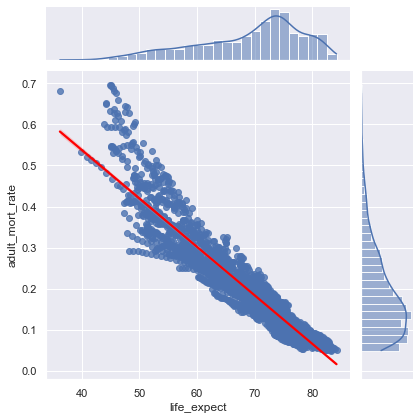

<Figure size 1440x720 with 0 Axes>

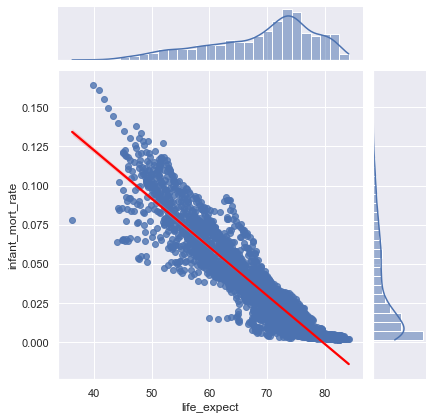

<Figure size 1440x720 with 0 Axes>

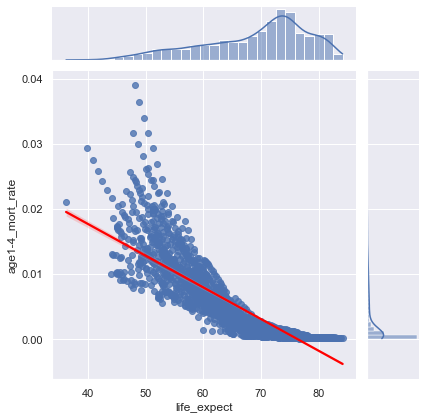

<Figure size 1440x720 with 0 Axes>

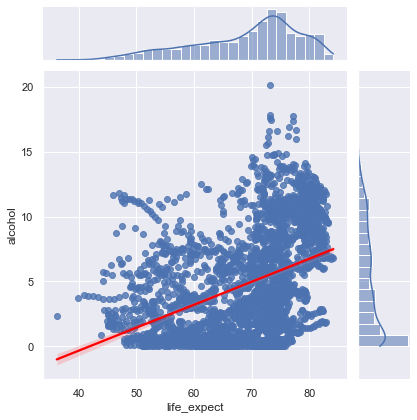

<Figure size 1440x720 with 0 Axes>

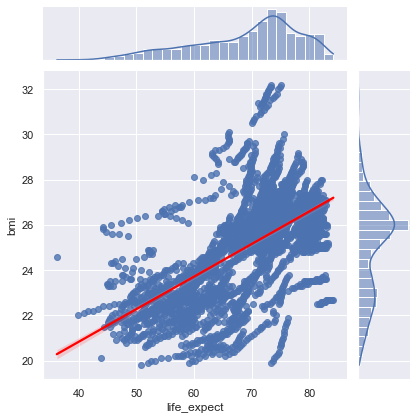

<Figure size 1440x720 with 0 Axes>

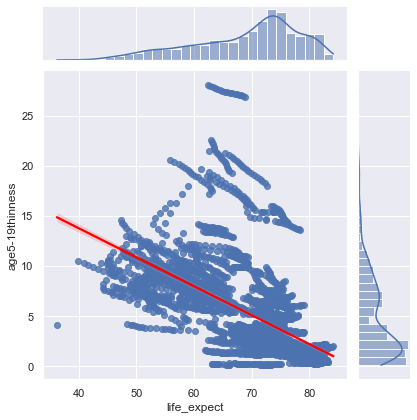

<Figure size 1440x720 with 0 Axes>

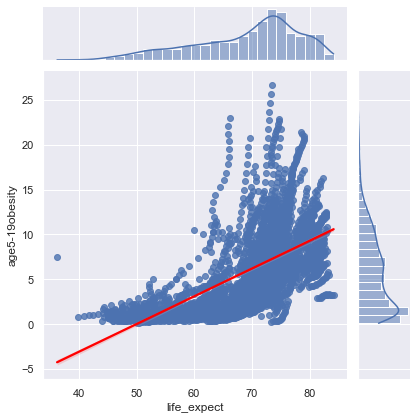

<Figure size 1440x720 with 0 Axes>

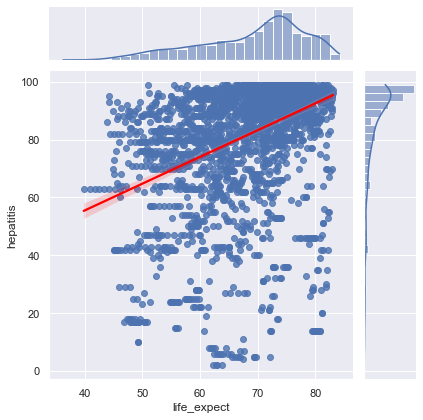

<Figure size 1440x720 with 0 Axes>

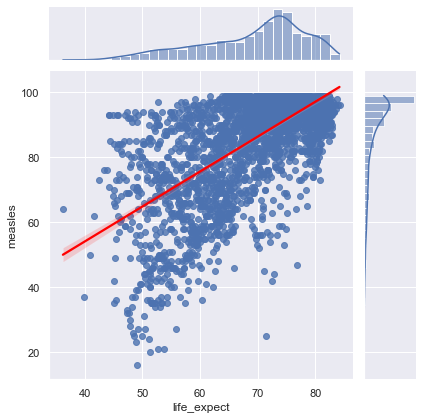

<Figure size 1440x720 with 0 Axes>

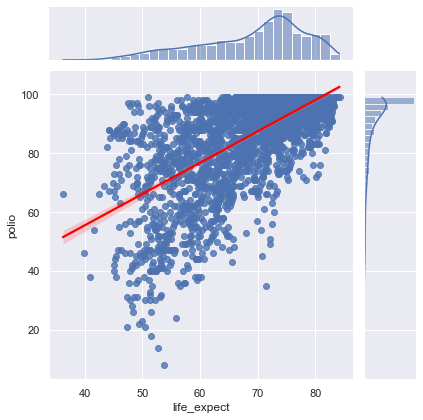

<Figure size 1440x720 with 0 Axes>

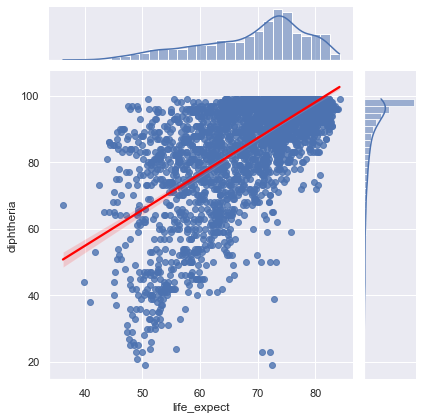

<Figure size 1440x720 with 0 Axes>

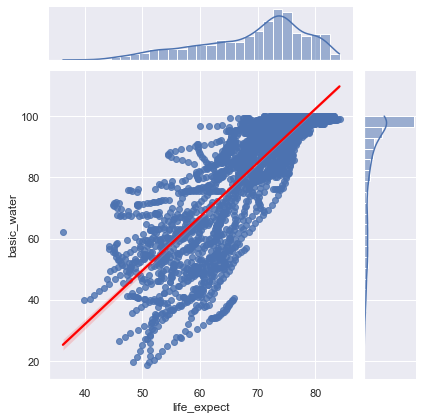

<Figure size 1440x720 with 0 Axes>

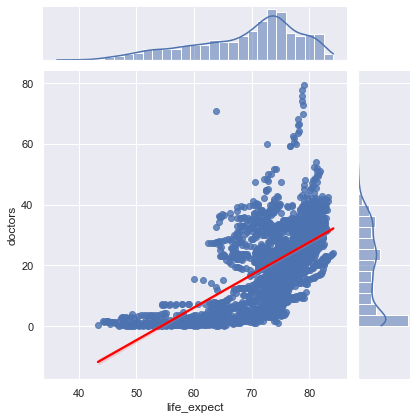

<Figure size 1440x720 with 0 Axes>

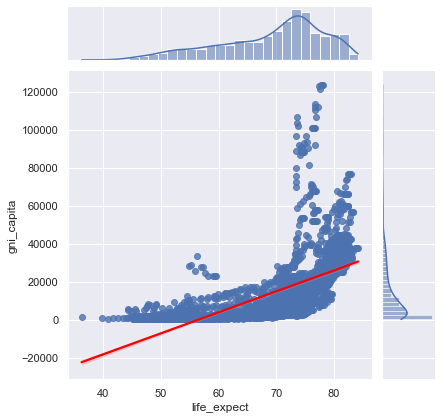

<Figure size 1440x720 with 0 Axes>

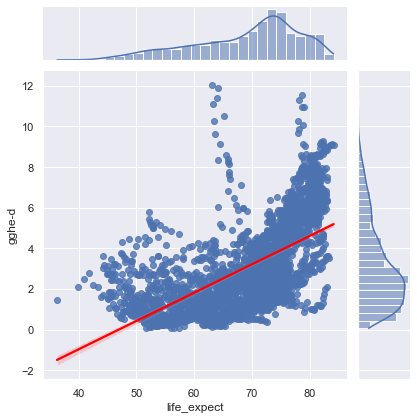

<Figure size 1440x720 with 0 Axes>

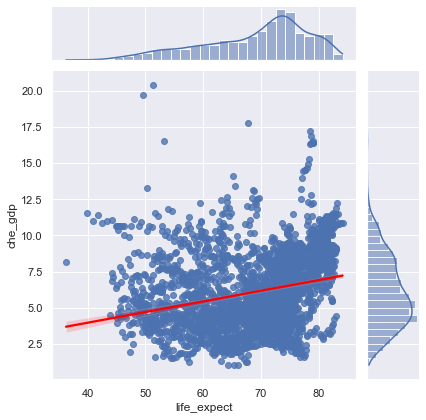

<Figure size 1440x720 with 0 Axes>

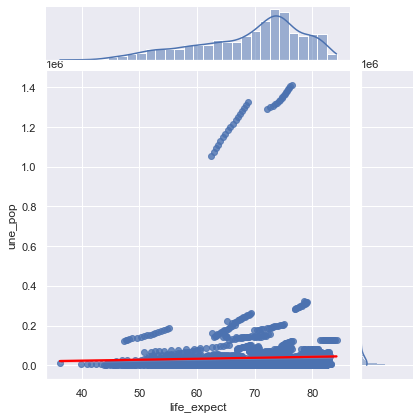

<Figure size 1440x720 with 0 Axes>

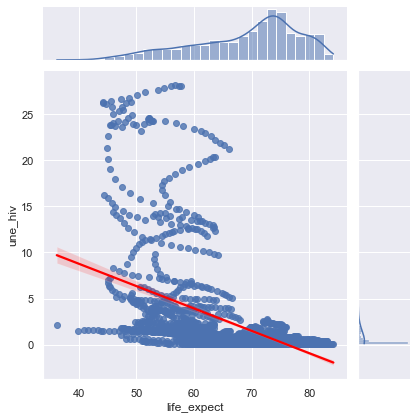

In [74]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

# Comparing features with life_exp60

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19200/3726013038.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 1440x720 with 0 Axes>

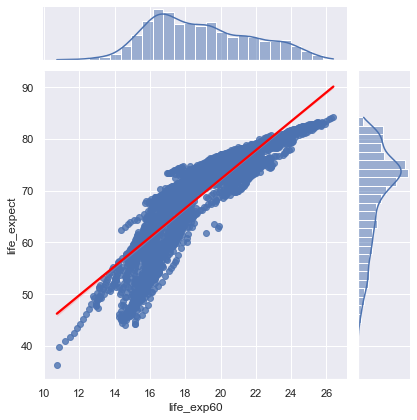

<Figure size 1440x720 with 0 Axes>

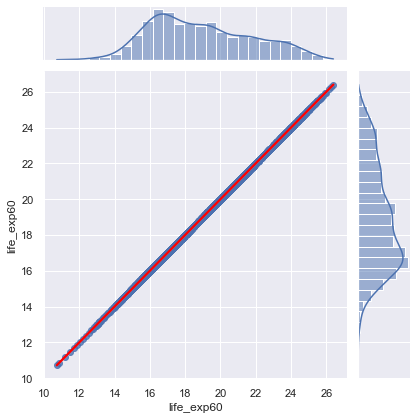

<Figure size 1440x720 with 0 Axes>

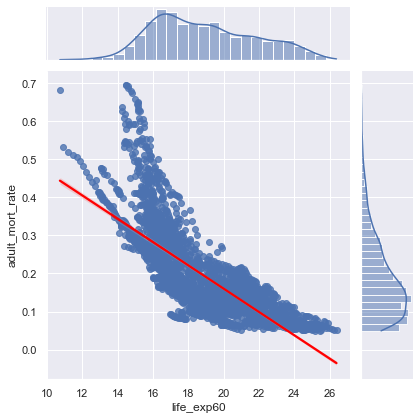

<Figure size 1440x720 with 0 Axes>

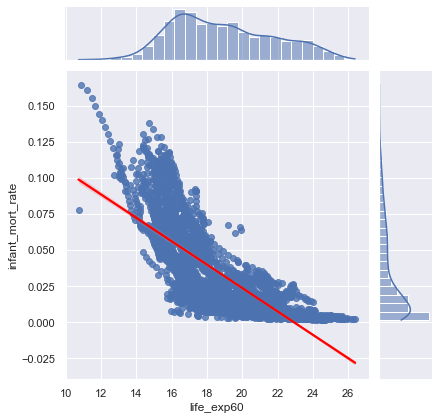

<Figure size 1440x720 with 0 Axes>

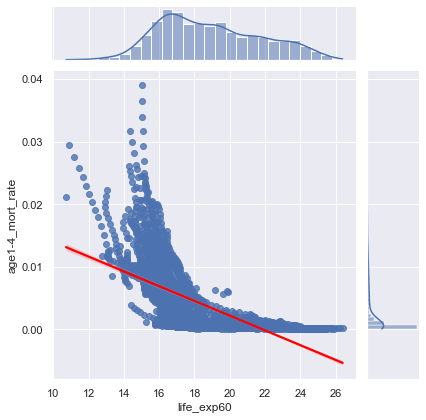

<Figure size 1440x720 with 0 Axes>

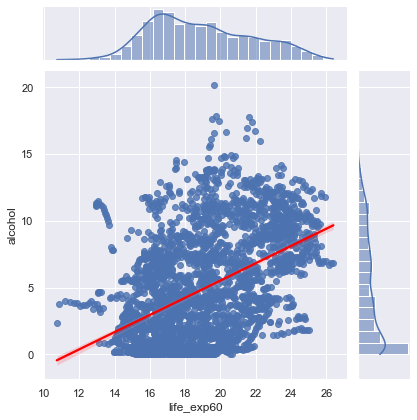

<Figure size 1440x720 with 0 Axes>

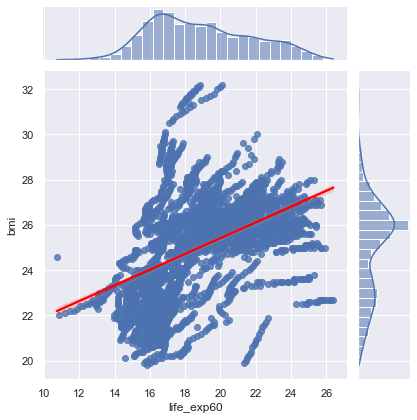

<Figure size 1440x720 with 0 Axes>

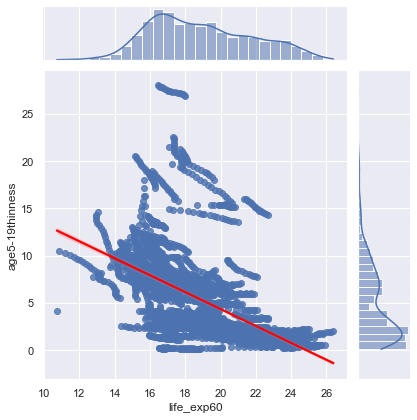

<Figure size 1440x720 with 0 Axes>

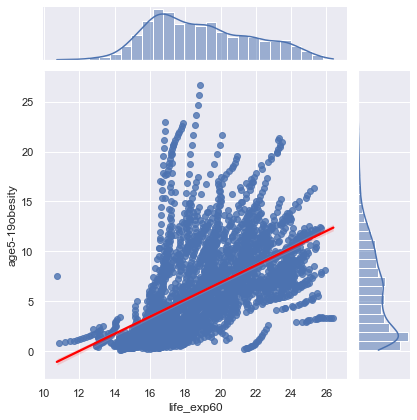

<Figure size 1440x720 with 0 Axes>

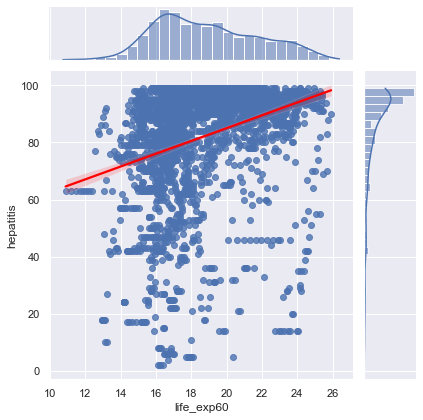

<Figure size 1440x720 with 0 Axes>

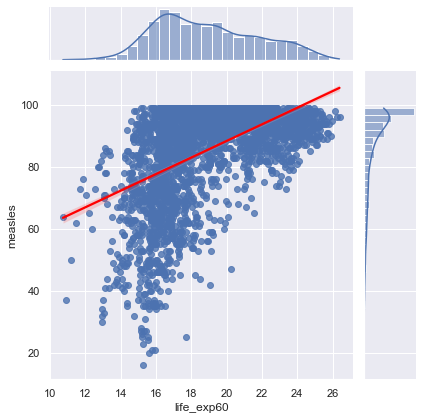

<Figure size 1440x720 with 0 Axes>

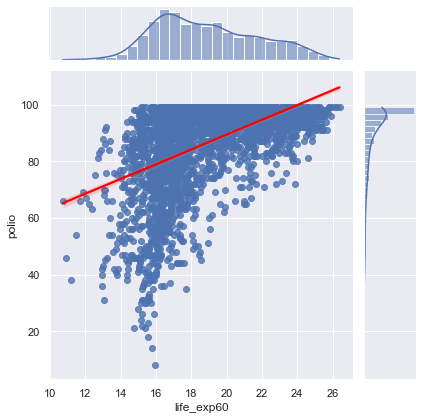

<Figure size 1440x720 with 0 Axes>

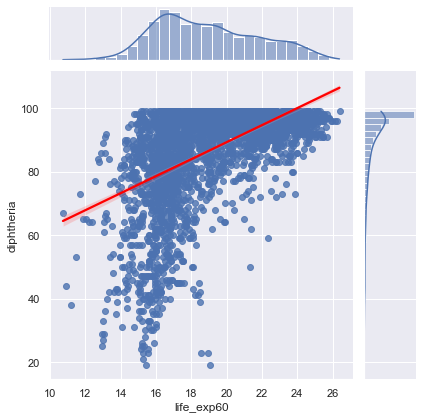

<Figure size 1440x720 with 0 Axes>

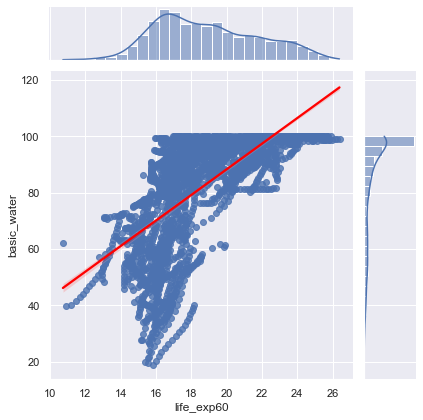

<Figure size 1440x720 with 0 Axes>

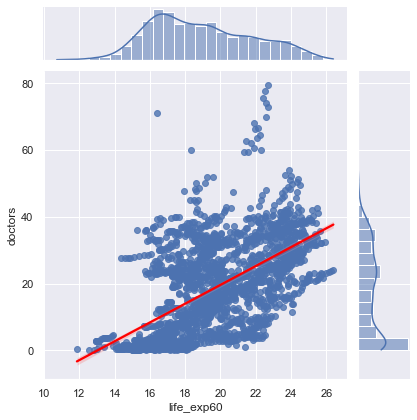

<Figure size 1440x720 with 0 Axes>

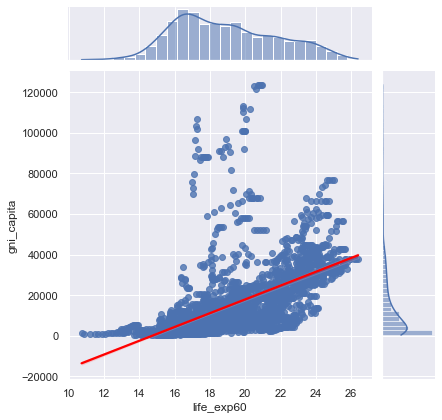

<Figure size 1440x720 with 0 Axes>

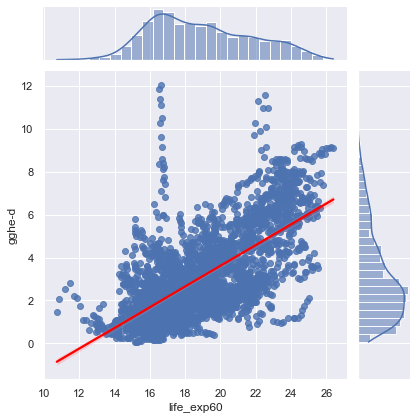

<Figure size 1440x720 with 0 Axes>

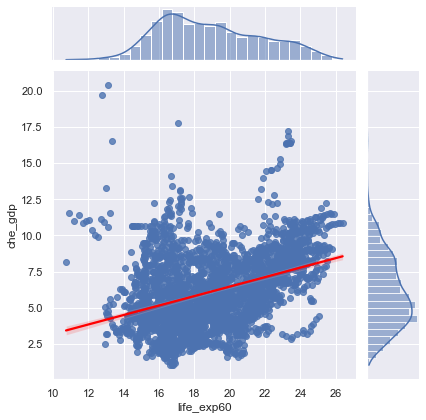

<Figure size 1440x720 with 0 Axes>

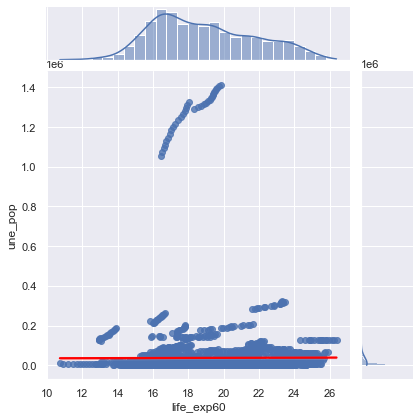

<Figure size 1440x720 with 0 Axes>

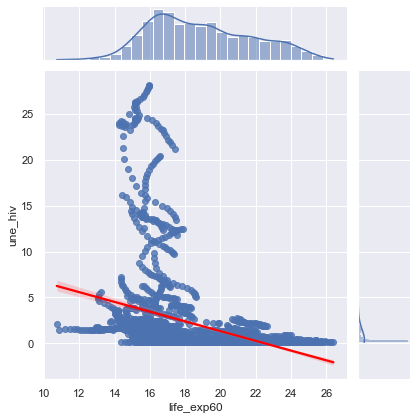

In [75]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=df_numeric, x="life_exp60", y=i, kind="reg",line_kws={"color": "red"})

In [76]:
df_numeric.describe()

life_expect   life_exp60  adult_mort_rate  infant_mort_rate  \
count  3111.000000  3111.000000      3111.000000       3111.000000   
mean     69.146384    18.912060         0.193528          0.032496   
std       9.129761     2.885412         0.114007          0.030361   
min      36.227360    10.728000         0.049202          0.001470   
25%      63.200095    16.619485         0.108270          0.008255   
50%      71.597200    18.508260         0.164822          0.019995   
75%      75.537030    21.099175         0.250832          0.051720   
max      84.166160    26.394020         0.696874          0.164515   

       age1-4_mort_rate      alcohol          bmi  age5-19thinness  \
count       3111.000000  3083.000000  3077.000000      3077.000000   
mean           0.003489     4.850654    25.052714         5.312447   
std            0.005146     4.002535     2.193445         4.652408   
min            0.000065     0.000000    19.800000         0.100000   
25%            0.000355     1.200510    23.300000         1.800000   
50%            0.000895     4.021600    25.500000         3.800000   
75%            0.004877     7.814025    26.500000         7.800000   
max            0.039095    20.182460    32.200000        28.100000   

       age5-19obesity    hepatitis      measles        polio   diphtheria  \
count     3077.000000  2881.000000  3100.000000  3100.000000  3100.000000   
mean         5.972278    82.141617    85.530000    86.584194    86.406129   
std          4.530812    20.565142    15.282203    14.975650    15.335294   
min          0.100000     2.000000    16.000000     8.000000    19.000000   
25%          2.000000    76.000000    79.000000    81.000000    82.000000   
50%          5.200000    91.000000    92.000000    93.000000    93.000000   
75%          8.900000    96.000000    96.000000    97.000000    97.000000   
max         26.700000    99.000000    99.000000    99.000000    99.000000   

       basic_water      doctors     gni_capita       gghe-d      che_gdp  \
count  3100.000000  2216.000000    3004.000000  3043.000000  3026.000000   
mean     83.390295    18.021928   14329.687084     3.116490     6.119615   
std      19.238249    13.906474   17262.440711     2.086198     2.514591   
min      18.695210     0.128000     250.000000     0.062360     1.025160   
25%      71.832917     4.346875    2690.000000     1.532075     4.234580   
50%      92.203705    17.674500    8027.000000     2.601750     5.764255   
75%      98.552870    28.570250   19655.000000     4.269990     7.880403   
max     100.000010    79.541000  123860.000000    12.062730    20.413410   

            une_pop      une_hiv  
count  3.080000e+03  2380.000000  
mean   3.722953e+04     2.031513  
std    1.377832e+05     4.585364  
min    7.601600e+01     0.100000  
25%    2.197585e+03     0.100000  
50%    8.568698e+03     0.400000  
75%    2.517140e+04     1.500000  
max    1.414049e+06    28.200000

# Insights from EDA (global)

# Alcohol and LE

From the jointplot, we can see the alcohol has a positive relation with life expectancy and life expectancy from 60. Alcohol has a 0.40 correlation with life expectancy and has a 0.47 correlation with life expectancy from 60. 

This is different from our assumption as we assumed that alcohol would have a negative relationship with life expectancy. Upon further research, we realised that alcohol in moderation can have beneficial health effects and may lead to longetivity. (https://time.com/5166514/moderate-drinking-live-longer-study/)

Furthermore, from the distibution of alcohol we can see that the median is around 4.02 liters per capita and the median of life_exp60 is around 18.5 years. The median of alcohol and life_exp60 is close to its mean. The mean of alcohol consumption is 4.85 liters per capita and the mean of life_exp is 18.91. Hence, on average, individuals in countries have a low to moderate alcohol consumption. This coincides with the positive relationship between alcohol and life expectancy when alcohol is consumed in moderation.

Since life_expect and life_exp60 have a strong correlation we just plotted life_exp60 since it has a stronger correlation with alcohol.

<Figure size 1440x720 with 0 Axes>

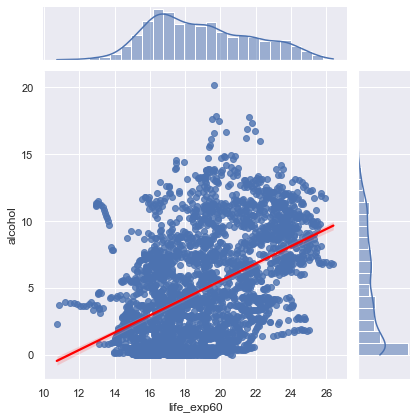

In [77]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_exp60", y="alcohol", kind="reg",line_kws={"color": "red"})

# Obesity and LE

Another area of interest is the obesity rate from ages 5-19 and thiness from ages 5-19. Thinness and obesity have a slightly higher correlation with life expectancy (-0.57 and 0.62 respectively) than with life expectancy at 60 (-0.56 and 0.55 respectively). However, the correlations are very close to each other so we will just be using life_expect as a comparison.

<Figure size 1440x720 with 0 Axes>

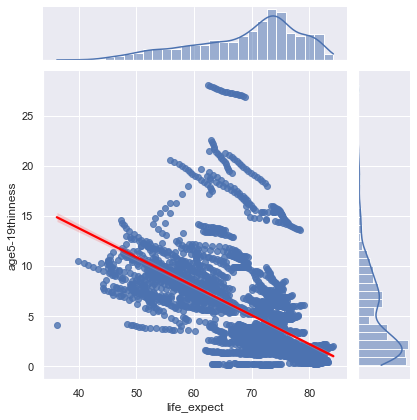

In [78]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19thinness", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

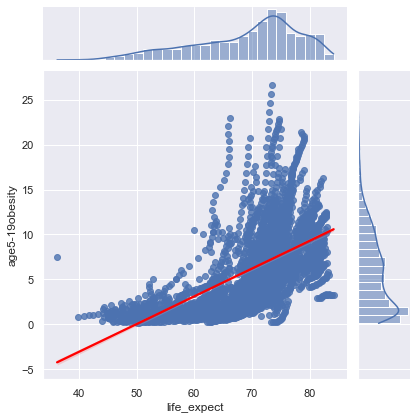

In [79]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="age5-19obesity", kind="reg",line_kws={"color": "red"})

<Figure size 1440x720 with 0 Axes>

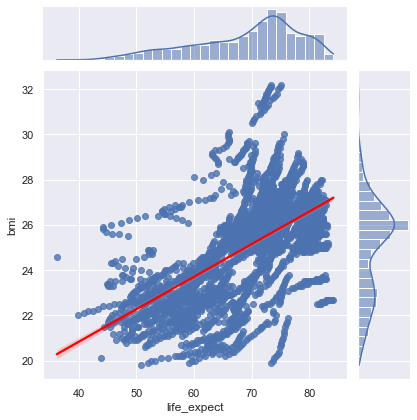

In [80]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="life_expect", y="bmi", kind="reg",line_kws={"color": "red"})

Thinness has a negative relationship with life expectancy which matches our assumption. However the relationship between age5-19obesity contradicted our assumptions that it would also have a negative relationship. However, instead, age5-19 obesity seems to be increasing with life expectancy.

Upon further inspection, we realised that the mean of bmi is only around 25.05 and since age5-19obesity is measured by the percentage of population of bmi>mean +2s.d which means the obesity is considered as bmi>30. The average percentage of population with bmi > 30 is around 5.97%. This also considers people who are obese and not only those who are severely obese. Hence, age5-19obesity may not be affecting the life-expectancy of the population as much. 

Research also says that being underweight is deadlier than being overweight which could contribute to the differences in relationship with life expectancy. Those who have bmi < 18.5 are 1.8 times more likely to be at risk of dying compared to a person with average bmi and those who have bmi >30 are only 1.2 more likely to be at risk of die compared to an average person. 

Furthermore, BMI does not only indicate body fat but also muscle mass. A person with a higher bmi may also have a higher muscle mass which could contribute to the increase in life expectancy. (https://www.webmd.com/diet/news/20140328/underweight-even-deadlier-than-overweight-study-says#:~:text=People%20who%20are%20clinically%20underweight,more%20than%2050%20prior%20studies.)


# Top predictors for life expectancy and life expectancy at 60

From the heatmap some areas of interest are adult mortality rate, infant mortality rate and age1-4 mortality rate as they have the strongest negative correlation with life expectancy (-0.95,-0.93,-0.86 respectively). They also have the strongest correlation rate with life expectancy at 60 which is -0.78 with adult mortality rate, -0.77 with infant mortality rate and -0.66 with child(ages 1-4) mortality rate.

In [81]:
adult_mort_rate = pd.DataFrame(df_numeric['adult_mort_rate'])
adult_mort_rate

adult_mort_rate
0            0.383558
1            0.372388
2            0.354515
3            0.343217
4            0.333871
...               ...
3106         0.209267
3107         0.205146
3108         0.200820
3109         0.196661
3110         0.192794

[3111 rows x 1 columns]

In [82]:
infant_mort_rate = pd.DataFrame(df_numeric['infant_mort_rate'])
infant_mort_rate

infant_mort_rate
0             0.137985
1             0.133675
2             0.128320
3             0.122040
4             0.115700
...                ...
3106          0.055840
3107          0.055350
3108          0.054585
3109          0.053465
3110          0.051895

[3111 rows x 1 columns]

In [83]:
child_mort_rate = pd.DataFrame(df_numeric['age1-4_mort_rate'])
child_mort_rate

age1-4_mort_rate
0             0.025695
1             0.024500
2             0.023260
3             0.021925
4             0.020545
...                ...
3106          0.004845
3107          0.004600
3108          0.004405
3109          0.004160
3110          0.003990

[3111 rows x 1 columns]

In [91]:
life_expect = pd.DataFrame(df_numeric['life_expect'])
life_expect

life_expect
0        47.33730
1        48.19789
2        49.42569
3        50.50266
4        51.52863
...           ...
3106     64.49448
3107     64.79716
3108     65.10757
3109     65.45008
3110     65.79089

[3111 rows x 1 columns]

In [92]:
life_exp60 = pd.DataFrame(df_numeric['life_exp60'])
life_exp60

life_exp60
0       14.73400
1       14.95963
2       15.20010
3       15.39144
4       15.56860
...          ...
3106    16.57977
3107    16.64219
3108    16.70787
3109    16.77074
3110    16.83024

[3111 rows x 1 columns]

In [93]:
mort_rate = pd.concat([life_expect,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_expect.index)
mort_rate

life_expect  adult_mort_rate  infant_mort_rate  age1-4_mort_rate
0        47.33730         0.383558          0.137985          0.025695
1        48.19789         0.372388          0.133675          0.024500
2        49.42569         0.354515          0.128320          0.023260
3        50.50266         0.343217          0.122040          0.021925
4        51.52863         0.333871          0.115700          0.020545
...           ...              ...               ...               ...
3106     64.49448         0.209267          0.055840          0.004845
3107     64.79716         0.205146          0.055350          0.004600
3108     65.10757         0.200820          0.054585          0.004405
3109     65.45008         0.196661          0.053465          0.004160
3110     65.79089         0.192794          0.051895          0.003990

[3111 rows x 4 columns]

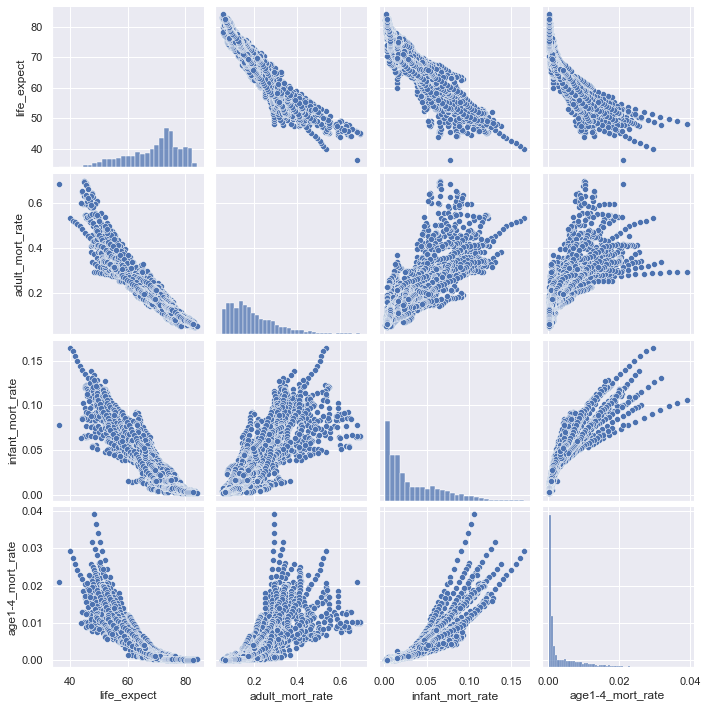

In [96]:
sb.pairplot(data = mort_rate)

In [94]:
mort_rate60 = pd.concat([life_exp60,adult_mort_rate,infant_mort_rate,child_mort_rate],axis=1).reindex(life_exp60.index)
mort_rate60

life_exp60  adult_mort_rate  infant_mort_rate  age1-4_mort_rate
0       14.73400         0.383558          0.137985          0.025695
1       14.95963         0.372388          0.133675          0.024500
2       15.20010         0.354515          0.128320          0.023260
3       15.39144         0.343217          0.122040          0.021925
4       15.56860         0.333871          0.115700          0.020545
...          ...              ...               ...               ...
3106    16.57977         0.209267          0.055840          0.004845
3107    16.64219         0.205146          0.055350          0.004600
3108    16.70787         0.200820          0.054585          0.004405
3109    16.77074         0.196661          0.053465          0.004160
3110    16.83024         0.192794          0.051895          0.003990

[3111 rows x 4 columns]

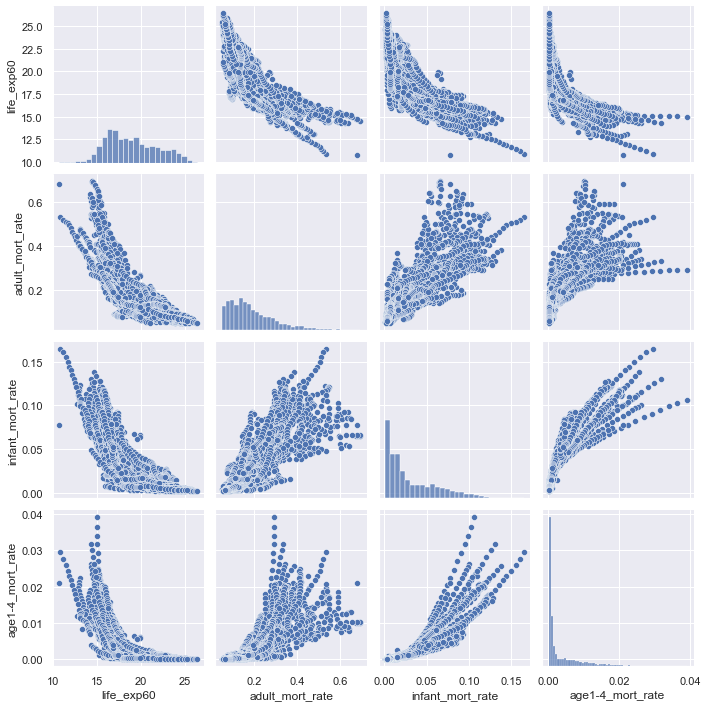

In [95]:
sb.pairplot(data = mort_rate60)

There is a linear relationship between mortality rates and life expectancy as well as between mortality rates and life expectancy at 60. Since the pair plot results of both life expectancy and life expectancy at 60 is similar, we will just be using life expectancy as a comparison. 

As life expectancy increases, the mortality rates of adult, infant, and child from ages 1 to 4 all decrease as well. From the pairplot we can see that the relationship between adult mortality and life expectancy is the strongest followed by infant mortality rate and then mortality rates from ages 1-4. 

We can explore what factors are significant in affecting mortality rate across age groups and if it is the same across all age groups. 

From the heatmap above we can see a relatively high correlation between the mortality rates and other factors as well. 

For adult mortality, it has strong correlation with infant mortality,child mortality and basic water at -0.81,-0.76 and -0.73 respectively.

For infant mortality, it has strong correlation between child mortality, adult mortality and basic water as well at -0.91,-0.81 and -0.85 respectively. Infant mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.73,-0.72 and -0.72 respectively.

For child mortality(ages 1-4), it has strong correlation between infant mortality, adult mortality and basic water as well at -0.91,-0.76 and -0.80 respectively.Child mortality also had a strong correlation with polio, measles and diptheria vaccination at -0.70,-0.70 and -0.69 respectively.

Note that children under 5 are at high risk for polio, measles and diptheria and hence being vaccinated against these diseases would contribute towards the strong linear relationship with life expectancy.



In [ ]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="adult_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

In [ ]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="infant_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

In [ ]:
f = plt.figure(figsize=(20,10))
sb.jointplot(data=df_numeric, x="age1-4_mort_rate", y="basic_water", kind="reg",line_kws={"color": "red"})

From the scatter plots above we can see that the adult, infant and child (1-4) mortality rates is related to the percentage of the population having access to basic water services. The mortality rates have a negative, linear relationship with basic_water. The median for basic water is about 92% and the median for the adult, infant and child mortality are all relatively low at around 0 to 0.2. 

This could be the reason why basic water also has a strong correlation with life expectancy (0.83) and life expectancy at 60 (0.68).


Hence, from the analysis the top 4 significant features that affect life expectancy and life expectancy at 60 is adult_mort_rate, infant_mort_rate, age1-4_mort_rate and basic_water.

# Difference between life_expect and life_exp60

The correlation of most of the features with life_expect is higher than with life_exp60 but the correlation values are close to each other. The 2 features that have higher correlation with life_exp60 than life_exp is gghe and che_gdp.life_exp60 has correlation of 0.67 and 0.38 with gghe and che_gdp respectively which is higher than 0.61 and 0.27 with life_exp. This could be attributed to the medical subsidies and services provided by the government for people at 60 years of age and beyond. In the machine learning models we will be trying to find the equation to predict life expectancy and life expectancy at 60 and the weight of each feature. We will also be comparing the models life_expect and life_exp60 to see if there is any significant differences. 

However, since life_expect and life_exp60 are very similar we will just use life_expect when comparing data regionally.

# EDA for categorical variable (region)

In [97]:
print("Number of countries for each region: ")
print(df["region"].value_counts()//17)


Number of countries for each region: 
Europe                   50
Africa                   47
Americas                 33
Eastern Mediterranean    21
Western Pacific          21
South-East Asia          11
Name: region, dtype: int64


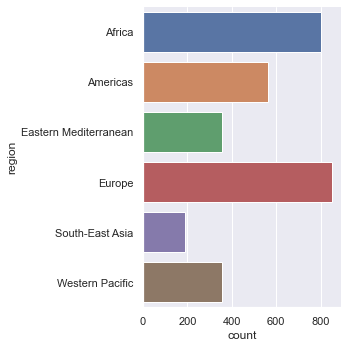

In [106]:
sb.catplot(y = "region", kind = "count", data = df)

In [242]:
# General trends in each region
Africa_df = pd.DataFrame(new_df[new_df['region']=='Africa'])
print("Africa")
display(Africa_df.describe())

Europe_df = pd.DataFrame(new_df[new_df['region']=='Europe'])
print("Europe")
display(Europe_df.describe())

SEA_df = pd.DataFrame(new_df[new_df['region']=='South-East Asia'])
print("South East Asia")
display(SEA_df.describe())

EM_df = pd.DataFrame(new_df[new_df['region']=='Eastern Mediterranean'])
print("Eastern Mediterranean")
display(EM_df.describe())

WP_df = pd.DataFrame(new_df[new_df['region']=='Western Pacific'])
print("Western Pacific")
display(WP_df.describe())

Americas_df = pd.DataFrame(new_df[new_df['region']=='Americas'])
print("Americas")
display(Americas_df.describe())



Africa


year  life_expect  life_exp60  adult_mort_rate  \
count   799.000000   799.000000  799.000000       799.000000   
mean   2008.000000    57.679362   16.098320         0.332461   
std       4.902048     7.068533    1.568292         0.113870   
min    2000.000000    39.827340   10.878510         0.095025   
25%    2004.000000    52.705245   15.158985         0.261622   
50%    2008.000000    57.418300   15.964940         0.310225   
75%    2012.000000    61.720360   16.886710         0.402231   
max    2016.000000    76.363650   21.920100         0.696874   

       infant_mort_rate  age1-4_mort_rate     alcohol         bmi  \
count        799.000000        799.000000  782.000000  782.000000   
mean           0.067450          0.009748    3.476394   23.004220   
std            0.027885          0.006032    3.158991    1.468254   
min            0.010910          0.000345    0.000910   19.800000   
25%            0.047115          0.005715    0.831065   22.000000   
50%            0.065845          0.008840    2.801010   22.900000   
75%            0.085985          0.012733    5.497630   23.900000   
max            0.164515          0.039095   20.182460   27.300000   

       age5-19thinness  age5-19obesity  ...     measles       polio  \
count       782.000000      782.000000  ...  788.000000  788.000000   
mean          8.453836        1.914194  ...   73.744924   75.752538   
std           2.099760        1.864697  ...   17.792026   18.239921   
min           3.500000        0.100000  ...   16.000000    8.000000   
25%           7.000000        0.900000  ...   62.000000   66.000000   
50%           8.200000        1.400000  ...   75.500000   79.000000   
75%           9.700000        2.175000  ...   89.000000   90.000000   
max          18.000000       13.500000  ...   99.000000   99.000000   

       diphtheria  basic_water     doctors    gni_capita      gghe-d  \
count  788.000000   788.000000  434.000000    788.000000  782.000000   
mean    75.685279    61.776346    2.546236   3844.263959    1.767241   
std     18.868163    17.199458    3.807816   5088.956186    1.135677   
min     19.000000    18.695210    0.128000    250.000000    0.062360   
25%     64.000000    49.634187    0.483250   1060.000000    0.916585   
50%     81.000000    60.348815    1.051000   1655.000000    1.488975   
75%     91.000000    72.871313    2.084500   3872.500000    2.408815   
max     99.000000    99.866690   21.943000  33700.000000    6.048290   

          che_gdp        une_pop     une_hiv  
count  782.000000     799.000000  765.000000  
mean     5.606044   17476.431468    5.457124  
std      2.473747   26562.598465    6.899345  
min      1.263570      80.996000    0.100000  
25%      3.908440    2031.316500    1.300000  
50%      5.015470    9734.767000    2.400000  
75%      6.915820   19953.512500    6.100000  
max     20.413410  185960.241000   28.200000  

[8 rows x 21 columns]

Europe


year  life_expect  life_exp60  adult_mort_rate  \
count   850.000000   850.000000  850.000000       850.000000   
mean   2008.000000    75.805259   20.747759         0.122783   
std       4.901864     4.824028    2.597635         0.058690   
min    2000.000000    63.543840   15.251870         0.049202   
25%    2004.000000    72.484710   18.598955         0.075394   
50%    2008.000000    76.143355   20.497230         0.106630   
75%    2012.000000    80.108415   23.230800         0.153507   
max    2016.000000    83.279110   25.918160         0.325958   

       infant_mort_rate  age1-4_mort_rate     alcohol         bmi  \
count        850.000000        850.000000  850.000000  850.000000   
mean           0.010885          0.000502    8.512997   26.034118   
std            0.013346          0.000664    3.707015    0.635716   
min            0.001470          0.000065    0.504680   24.100000   
25%            0.003561          0.000185    6.096007   25.600000   
50%            0.005288          0.000262    9.510030   26.000000   
75%            0.011694          0.000504   11.246348   26.400000   
max            0.084335          0.005085   17.870000   27.900000   

       age5-19thinness  age5-19obesity  ...     measles       polio  \
count       850.000000      850.000000  ...  850.000000  850.000000   
mean          1.868000        6.317529  ...   92.888235   94.338824   
std           1.061406        2.789541  ...    7.072765    6.114573   
min           0.200000        0.900000  ...   42.000000   45.000000   
25%           0.900000        4.100000  ...   90.000000   93.000000   
50%           1.900000        6.300000  ...   95.000000   96.000000   
75%           2.600000        8.200000  ...   97.000000   98.000000   
max           5.300000       13.800000  ...   99.000000   99.000000   

       diphtheria  basic_water     doctors    gni_capita      gghe-d  \
count  850.000000   850.000000  850.000000    850.000000  833.000000   
mean    94.162353    96.544288   30.267342  21645.223529    4.795935   
std      7.007618     6.222854    8.075494  14131.869013    1.999013   
min     19.000000    55.906010   11.695000    900.000000    0.733920   
25%     93.000000    96.038395   24.076250   9470.000000    3.372880   
50%     96.000000    99.442970   30.439500  20095.000000    4.731210   
75%     98.000000   100.000000   35.580000  31127.500000    6.317170   
max     99.000000   100.000010   70.946000  67920.000000    9.278430   

          che_gdp        une_pop     une_hiv  
count  816.000000     835.000000  595.000000  
mean     7.496743   18053.278492    0.204874  
std      1.887730   27305.093566    0.188186  
min      2.686830     280.435000    0.100000  
25%      6.008875    3944.037000    0.100000  
50%      7.412225    7614.952000    0.100000  
75%      8.979748   16076.681000    0.200000  
max     12.221370  146404.903000    0.900000  

[8 rows x 21 columns]

South East Asia


year  life_expect  life_exp60  adult_mort_rate  \
count   187.000000   187.000000  187.000000       187.000000   
mean   2008.000000    68.667484   18.026968         0.178059   
std       4.912131     4.247200    1.727434         0.047571   
min    2000.000000    58.168590   15.403790         0.052534   
25%    2004.000000    65.930770   16.565995         0.150051   
50%    2008.000000    68.443350   17.440720         0.177580   
75%    2012.000000    71.525110   19.619340         0.207594   
max    2016.000000    78.415510   22.088840         0.308671   

       infant_mort_rate  age1-4_mort_rate     alcohol         bmi  \
count        187.000000        187.000000  187.000000  187.000000   
mean           0.036754          0.002569    1.575887   22.302674   
std            0.019538          0.001791    1.889271    1.248071   
min            0.007185          0.000295    0.000430   19.900000   
25%            0.018920          0.001165    0.152465   21.300000   
50%            0.036280          0.002225    0.970410   22.200000   
75%            0.050800          0.003757    2.456710   23.250000   
max            0.086215          0.008155    7.540000   25.500000   

       age5-19thinness  age5-19obesity  ...     measles       polio  \
count       187.000000      187.000000  ...  187.000000  187.000000   
mean         14.682353        2.831551  ...   86.144385   87.978610   
std           5.709355        2.265382  ...   12.494967   13.035913   
min           4.900000        0.300000  ...   48.000000   38.000000   
25%          10.900000        1.100000  ...   77.500000   82.000000   
50%          14.300000        2.100000  ...   88.000000   93.000000   
75%          17.900000        3.800000  ...   97.000000   98.000000   
max          28.100000       11.300000  ...   99.000000   99.000000   

       diphtheria  basic_water     doctors    gni_capita      gghe-d  \
count  187.000000   187.000000  123.000000    153.000000  170.000000   
mean    86.385027    85.355459    6.288606   5517.516340    1.547350   
std     12.659791    13.070086    6.743499   3223.158038    1.268073   
min     54.000000    46.267880    1.339000   1140.000000    0.146860   
25%     78.500000    80.790375    2.982000   2460.000000    0.714085   
50%     90.000000    87.393260    4.502000   5150.000000    0.979530   
75%     98.000000    95.997545    6.184500   7690.000000    2.280648   
max     99.000000    99.373800   37.011000  13510.000000    7.367140   

          che_gdp       une_pop     une_hiv  
count  170.000000  1.870000e+02  119.000000  
mean     3.772842  1.604578e+05    0.470588  
std      1.920363  3.367459e+05    0.502089  
min      1.025160  2.793980e+02    0.100000  
25%      2.497845  1.143144e+03    0.100000  
50%      3.491005  2.666658e+04    0.300000  
75%      4.192328  1.358890e+05    0.700000  
max     11.471040  1.324517e+06    2.000000  

[8 rows x 21 columns]

Eastern Mediterranean


year  life_expect  life_exp60  adult_mort_rate  \
count   357.000000   357.000000  357.000000       357.000000   
mean   2008.000000    69.741827   18.200538         0.157469   
std       4.905855     6.691956    1.384688         0.080083   
min    2000.000000    51.068950   15.146200         0.056807   
25%    2004.000000    64.549580   17.250630         0.096249   
50%    2008.000000    72.672550   18.184360         0.127004   
75%    2012.000000    74.576750   19.211840         0.224939   
max    2016.000000    79.063800   21.728580         0.367664   

       infant_mort_rate  age1-4_mort_rate     alcohol         bmi  \
count        357.000000        357.000000  346.000000  340.000000   
mean           0.033116          0.002826    0.538545   26.134118   
std            0.028885          0.004211    0.649701    2.138180   
min            0.005725          0.000245    0.000000   21.700000   
25%            0.011365          0.000470    0.027257   24.450000   
50%            0.019695          0.000925    0.199725   26.350000   
75%            0.050320          0.003510    0.943832   28.000000   
max            0.117910          0.020425    2.683290   29.600000   

       age5-19thinness  age5-19obesity  ...     measles       polio  \
count       340.000000      340.000000  ...  357.000000  357.000000   
mean          7.505588        9.390882  ...   83.462185   84.599440   
std           4.715592        5.402322  ...   18.298150   17.765144   
min           2.800000        0.600000  ...   20.000000   24.000000   
25%           5.000000        4.700000  ...   70.000000   74.000000   
50%           6.200000        9.650000  ...   94.000000   94.000000   
75%           7.300000       13.100000  ...   98.000000   98.000000   
max          22.600000       22.900000  ...   99.000000   99.000000   

       diphtheria  basic_water     doctors     gni_capita      gghe-d  \
count  357.000000   357.000000  242.000000     312.000000  340.000000   
mean    84.313725    83.047589   14.611050   27320.833333    2.201919   
std     18.295550    20.575606    7.954173   32106.273791    1.065502   
min     24.000000    19.603010    0.230000     870.000000    0.084180   
25%     74.000000    75.553960    8.549500    4920.000000    1.522810   
50%     94.000000    91.566800   14.543000   11235.000000    2.129480   
75%     98.000000    98.273210   20.994750   36232.500000    2.743425   
max     99.000000   100.000000   37.273000  123860.000000    6.374170   

          che_gdp        une_pop     une_hiv  
count  340.000000     357.000000  272.000000  
mean     4.815452   27135.915059    0.226471  
std      2.107297   39142.562766    0.419934  
min      1.599960     592.468000    0.100000  
25%      3.179235    4068.570000    0.100000  
50%      4.384000   11397.188000    0.100000  
75%      5.737097   30214.193000    0.100000  
max     10.961980  203631.353000    2.300000  

[8 rows x 21 columns]

Western Pacific


year  life_expect  life_exp60  adult_mort_rate  \
count   357.000000   357.000000  357.000000       357.000000   
mean   2008.000000    72.233377   19.257922         0.150959   
std       4.905855     6.375649    3.140625         0.063991   
min    2000.000000    57.741880   14.384770         0.050826   
25%    2004.000000    67.656260   16.808350         0.090245   
50%    2008.000000    71.813050   17.978480         0.146083   
75%    2012.000000    76.411710   21.872060         0.205978   
max    2016.000000    84.166160   26.394020         0.279749   

       infant_mort_rate  age1-4_mort_rate     alcohol         bmi  \
count        357.000000        357.000000  357.000000  357.000000   
mean           0.023231          0.001547    3.532467   25.468067   
std            0.019917          0.001742    3.214270    3.057950   
min            0.001965          0.000120    0.091620   19.900000   
25%            0.006885          0.000310    0.918090   22.900000   
50%            0.018915          0.000945    2.133150   25.300000   
75%            0.029780          0.001880    5.661140   27.100000   
max            0.092460          0.009330   12.636490   32.200000   

       age5-19thinness  age5-19obesity  ...     measles       polio  \
count       357.000000      357.000000  ...  357.000000  357.000000   
mean          3.940616        7.680672  ...   86.137255   87.207283   
std           4.355831        5.632719  ...   14.261234   13.217143   
min           0.100000        0.200000  ...   25.000000   35.000000   
25%           0.600000        3.000000  ...   82.000000   81.000000   
50%           1.700000        6.500000  ...   92.000000   92.000000   
75%           6.400000       11.200000  ...   96.000000   97.000000   
max          16.000000       26.700000  ...   99.000000   99.000000   

       diphtheria  basic_water     doctors    gni_capita      gghe-d  \
count  357.000000   357.000000  283.000000    357.000000  357.000000   
mean    87.229692    85.032388   13.208426  15407.759104    3.192861   
std     13.174410    17.214213    9.848199  19369.792102    2.331050   
min     39.000000    33.956860    0.470000   1050.000000    0.366940   
25%     82.000000    77.991420    3.985000   2780.000000    1.623730   
50%     92.000000    91.590820   12.256000   5030.000000    2.364620   
75%     97.000000    98.849370   20.705500  25490.000000    3.794110   
max     99.000000   100.000000   35.672000  76850.000000   12.062730   

          che_gdp       une_pop     une_hiv  
count  357.000000  3.410000e+02  187.000000  
mean     5.556877  8.941007e+04    0.315508  
std      2.841966  2.923047e+05    0.291502  
min      1.850970  8.439600e+01    0.100000  
25%      3.455890  3.331650e+02    0.100000  
50%      4.556930  5.323700e+03    0.200000  
75%      7.578940  3.068465e+04    0.400000  
max     17.733070  1.414049e+06    1.200000  

[8 rows x 21 columns]

Americas


year  life_expect  life_exp60  adult_mort_rate  \
count   561.000000   561.000000  561.000000       561.000000   
mean   2008.000000    73.205263   20.665870         0.158033   
std       4.903352     4.281015    1.966908         0.050888   
min    2000.000000    36.227360   10.728000         0.062831   
25%    2004.000000    71.185840   19.340600         0.123459   
50%    2008.000000    73.541640   21.004440         0.154335   
75%    2012.000000    75.592730   21.967860         0.182426   
max    2016.000000    82.809720   25.671120         0.682531   

       infant_mort_rate  age1-4_mort_rate     alcohol         bmi  \
count        561.000000        561.000000  561.000000  561.000000   
mean           0.019537          0.001067    5.807241   26.418182   
std            0.012265          0.001407    2.305218    1.021479   
min            0.004030          0.000160    1.593370   23.300000   
25%            0.012620          0.000490    3.989640   25.700000   
50%            0.017055          0.000710    5.747930   26.400000   
75%            0.023685          0.001055    7.550000   27.000000   
max            0.077865          0.021100   13.780190   30.000000   

       age5-19thinness  age5-19obesity  ...     measles       polio  \
count       561.000000      561.000000  ...  561.000000  561.000000   
mean          2.572906        8.993761  ...   91.659537   90.450980   
std           1.393357        3.463722  ...    7.705051    8.600758   
min           0.500000        3.000000  ...   55.000000   50.000000   
25%           1.500000        6.300000  ...   89.000000   87.000000   
50%           2.200000        8.600000  ...   94.000000   93.000000   
75%           3.500000       11.000000  ...   96.000000   96.000000   
max           7.000000       21.400000  ...   99.000000   99.000000   

       diphtheria  basic_water     doctors    gni_capita      gghe-d  \
count  561.000000   561.000000  284.000000    544.000000  561.000000   
mean    90.527629    92.337764   17.806086  12407.738971    3.484724   
std      8.775353     7.495884   14.663434   9607.241805    1.773894   
min     43.000000    56.239290    0.852000   1370.000000    0.457740   
25%     88.000000    90.260840    8.939750   6550.000000    2.324890   
50%     93.000000    94.220060   15.420500   9900.000000    2.953680   
75%     96.000000    97.205210   20.473250  14982.500000    4.251060   
max     99.000000    99.699760   79.541000  53960.000000   11.574960   

          che_gdp        une_pop     une_hiv  
count  561.000000     561.000000  442.000000  
mean     6.692057   27534.484918    0.818552  
std      2.265768   61292.369656    0.671357  
min      3.217080      76.016000    0.100000  
25%      5.167700     746.163000    0.400000  
50%      6.072360    6303.974000    0.500000  
75%      7.717110   17400.347000    1.200000  
max     17.197260  323015.995000    3.000000  

[8 rows x 21 columns]

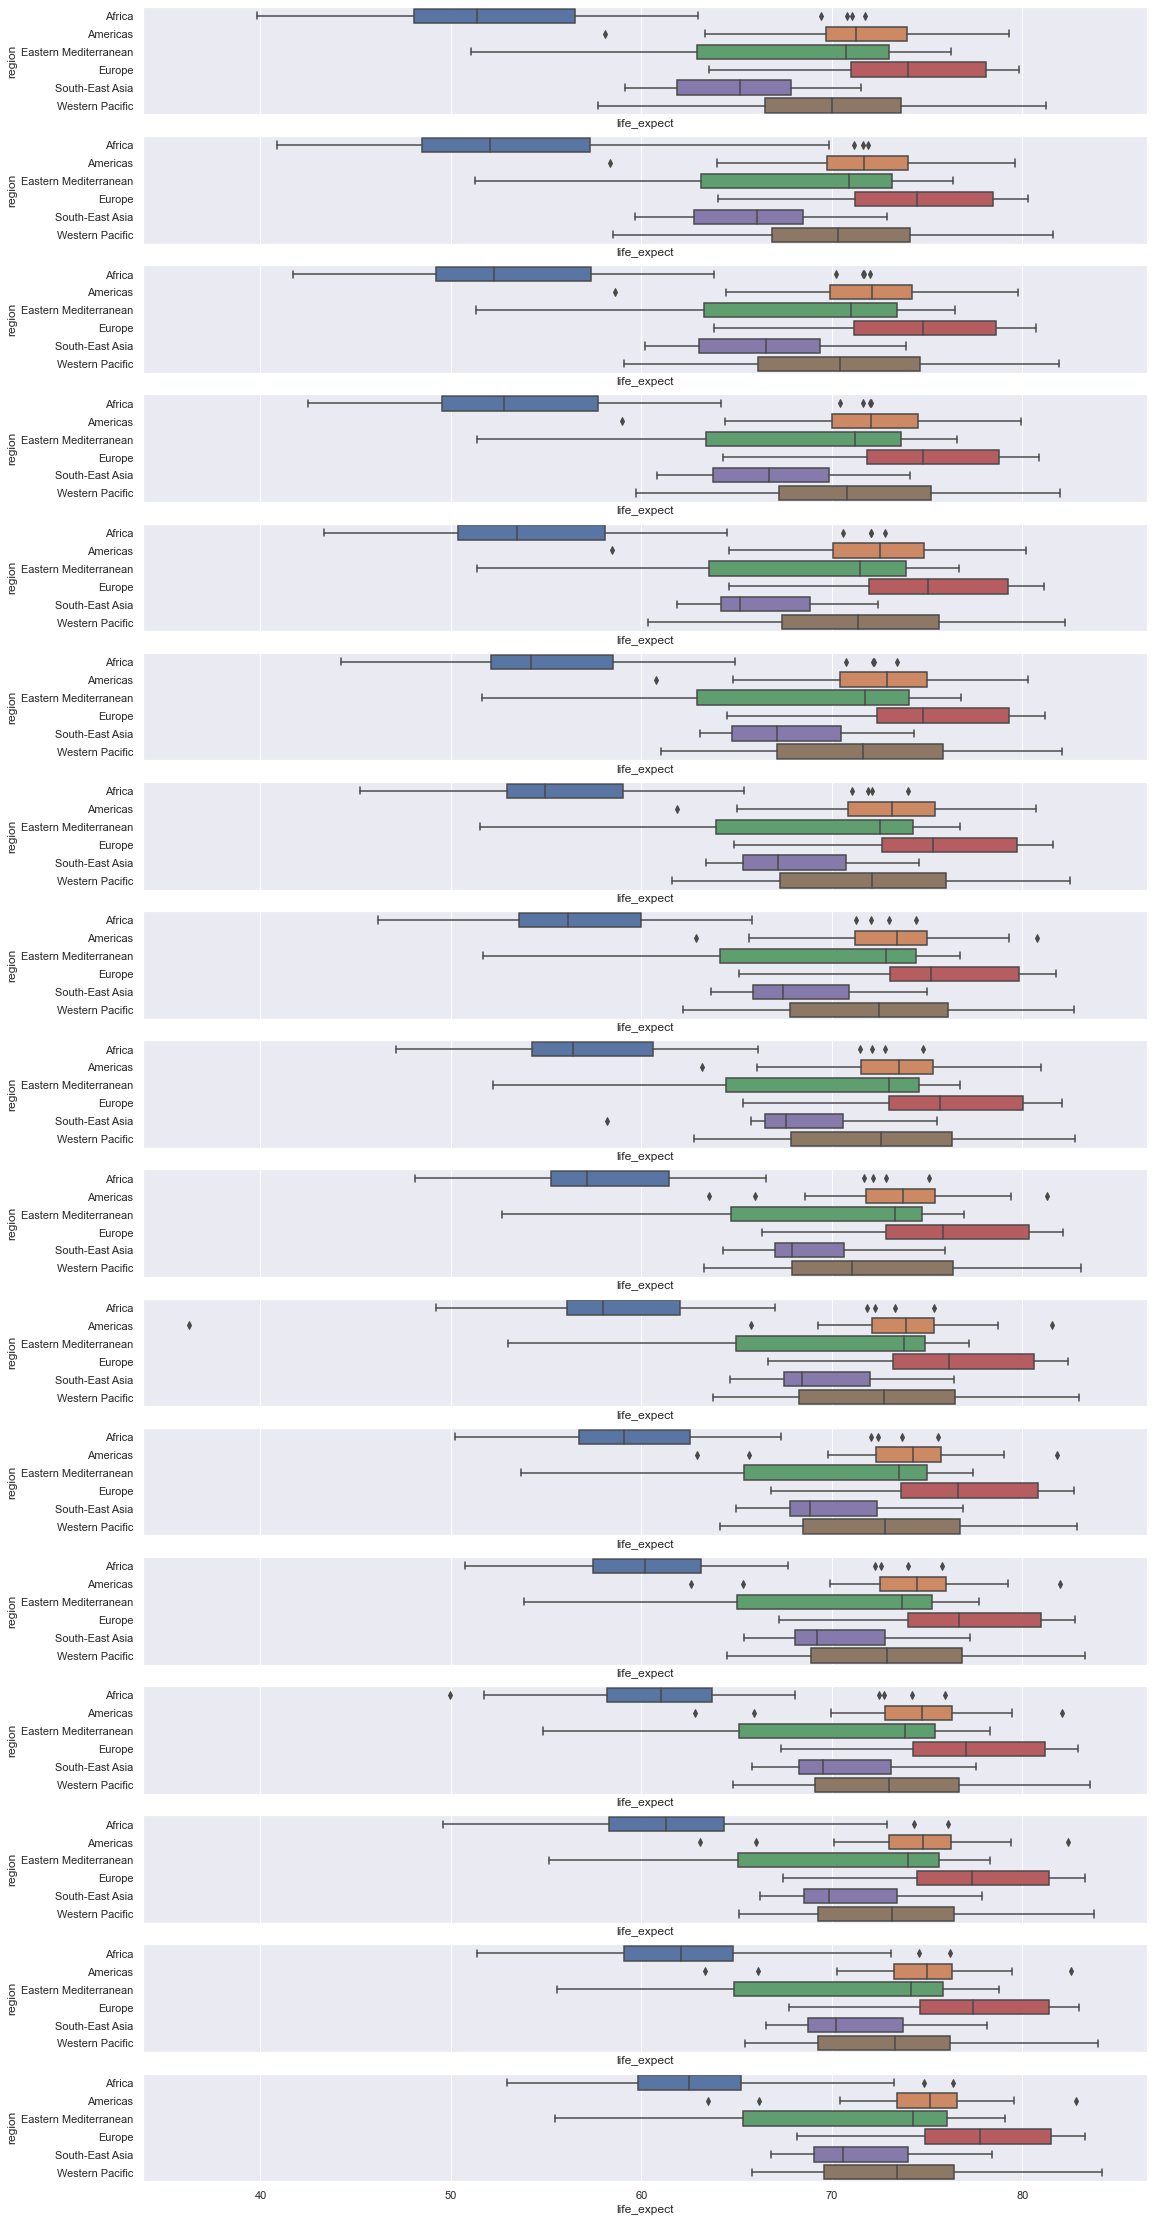

In [241]:
regionDF = pd.concat([df['region'], df['life_expect'], df['year']], axis = 1).reindex(df['region'].index)

f,axes = plt.subplots(17,1, figsize=(18, 40), sharex=True)

count = 0
year=2000
while count<17:
    tempDF = pd.DataFrame()
    tempDF['region']= regionDF['region']
    tempDF['life_expect'] = regionDF['life_expect']
    tempDF['year'] = regionDF['year']
    to_drop = tempDF[tempDF['year']!=year].index
    tempDF.drop(to_drop, inplace = True)
    sb.boxplot(x = "life_expect", y = "region", data = tempDF, orient = "h", ax=axes[count])
    count += 1
    year+=1



Insights: 
Distributions of life expectancy is distinct for each region as observed in the box-plot from 2000-2016.
From 2000-2016, the median life expectancy at birth for countries in Africa is significantly lower than other regions. 
Life expectancy has generally improved throughout the years as evidenced by the increasing median, higher concentration of data at higher life expectancy levels and a higher minimum life expectancy.

There is an an increase in median life expectancy levels from 2000-2016 for countries in Eastern Mediterranean. Distribution of life expectancy across the countries have become more compact and more concentrated at higher life expectancy levels. 

Other regions show relatively stagnant distributions.

# EDA of numerical variables (by region)

### Africa

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(Africa_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=Africa_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The correlation between adult_mort_rate,infant_mort_rate and age1-4_mort_rate and life expectancy in Africa is -0.87,-0.86,-0.78 respectively. These features have the strongest correlation with life expectancy in Africa and the skewness of adult_mort_rate, infant_mort_rate and age1-4_mort_rate is relatively close to 0.

Another feature that has a high correlation with life expectancy is doctors which is 0.64. However, from the scatter plot above, the data points seems to be spread out and it doesnt have a clear relationship with life_expect.Hence, the correlation of doctors with life expectancy may not be so accurate.

However, the age5-19obesity feature has a high correlation of 0.57 with life_expect and has a clearer non-linear relationship with life_expect. Another feature that has the next high correlation with life_expect is basic_water which is 0.56.It has a weak, linear relationship with life_expect.

The top 5 predictors for Africa are adult_mort_rate,infant_mort_rate, age1-4_mort_rate,age5-19obesity and basic_water.

### Europe

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(Europe_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=Europe_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The feature with the highest correlation with life_expect is adult_mort_rate, age5-19thinness,gni_capita,gghe-d and age5-19obesity. 

From the plots the relationship between life_expect and adult_mort_rate and the relationship between life_expect and age5-19thinness is negative, linear and strong. adult_mort_rate has a correlation of -0.92 and age5-19thinness has a correlation of -0.81. 

The relationship between gni_capita and life_expect seems to be non-linear from the plot.gni_capita has a correlation of 0.82 with life_expect.

The relationship between gghe-d and life expectancy and age5-19obesity and life_expect seems to be linear,positive but a weaker one since the points are more spread out. gghe_d and age5-19obesity has a correlation of 0.74 and 0.73 with life_expect respectively. 

The standard deviations for these features seems to be low as well. Hence, adult_mort_rate, age5-19thinness,gni_capita,gghe-d and age5-19obesity would be our top 5 factors for Europe which will be further tested by the ML model.



### Eastern Mediteranean

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(EM_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
EM_df.skew()

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=EM_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with the highest correlation are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, measles vaccination and polio vaccination.

adult_mort_rate, infant_mort_rate and age1-4_mort_rate have negative, linear relationships with life_expect. The correlations of adult_mort_rate, infant_mort_rate and age1-4_mort_rate are -0.97,-0.94,-0.89 repectively.

The correlation of measles and polio vaccination with life_expect is 0.86 and 0.84 respectively.Both have a linear and positive relation with life_expect. The data of measles and polio vaccination seemed to be skewed but the skew value for mealses and polio vaccination are -1.12 and -1.28 which is lower than that of diptheria vaccination depite the correlation between diptheria and life_expect being 0.84 

Hence the top 5 hypothesized predictors are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, measles vaccination and polio vaccination.



### Western Pacific

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(WP_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=WP_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with the highest correlation are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, basic_water and gni_capita.

adult_mort_rate, infant_mort_rate, age1-4_mort_rate all have positive, linear relationships with correlations of -0.97,-0.89,-0.81 respectively.

basic_water and gni_capita have a non-linear relationship and the correlation with life_expect is 0.80 and 0.70 respectively.

Top 5 predictors are adult_mort_rate, infant_mort_rate, age1-4_mort_rate, basic_water and gni_capita.



### Americas

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(Americas_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
Americas_df.skew()

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=Americas_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with high correlation with life_expect is adult_mort_rate, infant_mort_rate , age1-4_mort_rate,basic_water and gghe-d. 

The relationship of life_expect with adult_mort_rate, infant_mort_rate and age1-4_mort_rate are negative and linear. The correlation of adult_mort_rate, infant_mort_rate and age1-4_mort_rate are -0.97,-0.86,-0.79.

The data points of basic_water and gghe-d are skewed(-2.399 and 1.588 respectively) but the skew is generally lower compared to other features. 

Hence, the top 5 hypothesized features are adult_mort_rate, infant_mort_rate , age1-4_mort_rate,basic_water and gghe-d.




### South East Asia

In [ ]:
f = plt.figure(figsize=(25, 25))
sb.heatmap(SEA_df.drop(labels= ['country','region','year'],axis=1).corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [ ]:
SEA_df.skew()

In [ ]:
for i in df_numeric:
    f = plt.figure(figsize=(20,10))
    sb.jointplot(data=SEA_df, x="life_expect", y=i, kind="reg",line_kws={"color": "red"})

The 5 features with high correlation with life_expect is adult_mort_rate, infant_mort_rate , age1-4_mort_rate, measles vaccination and diptheria vaccination. 

The relationship between adult_mort_rate, infant_mort_rate , age1-4_mort_rate with life_expect is linear and negative. The correlation of adult_mort_rate, infant_mort_rate , age1-4_mort_rate are -0.85,-0.92 and -0.91 repectively. 

The relationship between measles vaccination and diptheria vaccination with life_expect seems to be non-linear and positive. The correlation of measles and diptheria vaccination with life_expect is 0.77 and 0.75 respectively.

Hence our top 5 hypothesized predictors are adult_mort_rate, infant_mort_rate , age1-4_mort_rate, measles vaccination and diptheria vaccination. 



# Machine Learning
1) Multi-variate Regression

2) RandomForestRegressor

3) GradientBoostingRegressor

## Preparing and standardising train and test datasets for machine learning

In [108]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

df_cat = df[['region']]
ohe.fit(df_cat)
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), columns=ohe.get_feature_names(df_cat.columns))

df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region_Africa                 3111 non-null   float64
 1   region_Americas               3111 non-null   float64
 2   region_Eastern Mediterranean  3111 non-null   float64
 3   region_Europe                 3111 non-null   float64
 4   region_South-East Asia        3111 non-null   float64
 5   region_Western Pacific        3111 non-null   float64
dtypes: float64(6)
memory usage: 146.0 KB


In [109]:
ml_df = pd.DataFrame(df.drop([ 'year', 'country', 'region'], axis=1))
ml_df_nc = pd.concat([ml_df, df_cat_ohe], sort=False, axis=1).reindex(index=df_cat_ohe.index)

#dropping the whole row if any null - ensure same number of data for each predictor
clean_ml_df = ml_df_nc.dropna()
clean_ml_df



life_expect  life_exp60  adult_mort_rate  infant_mort_rate  \
4        51.52863    15.56860         0.333871          0.115700   
9        57.29004    16.48146         0.281049          0.084800   
17       51.43743    15.71862         0.369974          0.103510   
18       52.03133    15.77446         0.365476          0.100855   
19       52.27760    15.80661         0.369024          0.097855   
...           ...         ...              ...               ...   
3106     64.49448    16.57977         0.209267          0.055840   
3107     64.79716    16.64219         0.205146          0.055350   
3108     65.10757    16.70787         0.200820          0.054585   
3109     65.45008    16.77074         0.196661          0.053465   
3110     65.79089    16.83024         0.192794          0.051895   

      age1-4_mort_rate  alcohol   bmi  age5-19thinness  age5-19obesity  \
4             0.020545  2.41274  22.2             10.3             0.8   
9             0.013310  6.11778  22.7              9.4             1.3   
17            0.017145  7.17131  20.6              9.1             0.3   
18            0.016470  6.62197  20.7              8.9             0.4   
19            0.015735  6.51436  20.8              8.8             0.4   
...                ...      ...   ...              ...             ...   
3106          0.004845  6.29833  22.4              9.2             3.1   
3107          0.004600  6.42186  22.6              9.1             3.5   
3108          0.004405  6.64447  22.7              9.0             3.8   
3109          0.004160  6.83826  22.8              8.9             4.2   
3110          0.003990  7.11148  22.9              8.9             4.7   

      hepatitis  ...   gghe-d  che_gdp    une_pop  une_hiv  region_Africa  \
4          43.0  ...  1.68663  3.96720  18758.145      1.3            1.0   
9          47.0  ...  2.60046  3.84261  22514.281      1.7            1.0   
17         83.0  ...  1.46507  6.17697   6378.871      3.3            1.0   
18         83.0  ...  1.69244  6.40484   6525.545      3.1            1.0   
19         83.0  ...  1.53550  6.47216   6704.113      2.8            1.0   
...         ...  ...      ...      ...        ...      ...            ...   
3106       79.0  ...  0.43670  2.07638   6444.530      0.3            0.0   
3107       87.0  ...  0.71266  2.39985   6541.304      0.3            0.0   
3108       88.0  ...  0.68373  2.29846   6639.756      0.3            0.0   
3109       81.0  ...  0.86391  2.45366   6741.164      0.3            0.0   
3110       66.0  ...  0.76495  2.36087   6845.846      0.3            0.0   

      region_Americas  region_Eastern Mediterranean  region_Europe  \
4                 0.0                           0.0            0.0   
9                 0.0                           0.0            0.0   
17                0.0                           0.0            0.0   
18                0.0                           0.0            0.0   
19                0.0                           0.0            0.0   
...               ...                           ...            ...   
3106              0.0                           0.0            0.0   
3107              0.0                           0.0            0.0   
3108              0.0                           0.0            0.0   
3109              0.0                           0.0            0.0   
3110              0.0                           0.0            0.0   

      region_South-East Asia  region_Western Pacific  
4                        0.0                     0.0  
9                        0.0                     0.0  
17                       0.0                     0.0  
18                       0.0                     0.0  
19                       0.0                     0.0  
...                      ...                     ...  
3106                     0.0                     1.0  
3107                     0.0                     1.0  
3108                     0.0           

Insights:
Will take life_expect and life_exp60 as response variables for machine learning and compare to see if there is any difference

Obvious that life_exp60 will be most highly correlated with life_expect (maybe EDA will show the same result also need check) + both have similar derivations

In [110]:
#creating Train and Test datasets for Regression
from sklearn.model_selection import train_test_split

y_le = pd.DataFrame(clean_ml_df['life_expect'])
y_le60 = pd.DataFrame(clean_ml_df['life_exp60'])
X = pd.DataFrame(clean_ml_df.drop(['life_expect', 'life_exp60'], axis=1))

#ensuring same splits for comparison after machine learning
X_train, X_test, y_train_le, y_test_le = train_test_split(X, y_le, test_size = 0.25, random_state = 42)
X_train, X_test, y_train_le60, y_test_le60 = train_test_split(X, y_le60, test_size = 0.25, random_state = 42)

print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 24)
Test Set for y=life_expect: (364, 1) (364, 24)

Train Set for y=life_exp60: (1091, 1) (1091, 24)
Test Set for y=life_exp60: (364, 1) (364, 24)


## Model 1: Multi-Variate Regression
https://blog.minitab.com/en/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables
https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/

### Analysing response = life_expect dataset

In [111]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train_le) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



Intercept of Regression: b =  [86.65297842]



Predictors  Coefficients
2               age1-4_mort_rate   -253.646492
1               infant_mort_rate    -72.290380
0                adult_mort_rate    -46.641377
19               region_Americas      0.875379
18                 region_Africa     -0.843383
20  region_Eastern Mediterranean     -0.824731
22        region_South-East Asia      0.719415
14                        gghe-d      0.298362
4                            bmi     -0.295682
23        region_Western Pacific      0.154104
17                       une_hiv      0.117801
15                       che_gdp      0.087632
21                 region_Europe     -0.080785
6                 age5-19obesity      0.068946
5                age5-19thinness     -0.045063
3                        alcohol      0.028628
11                   basic_water      0.018887
10                    diphtheria     -0.016148
9                          polio     -0.005147
12                       doctors      0.003797
8                        measles      0.003395
7                      hepatitis      0.000628
13                    gni_capita      0.000018
16                       une_pop     -0.000001

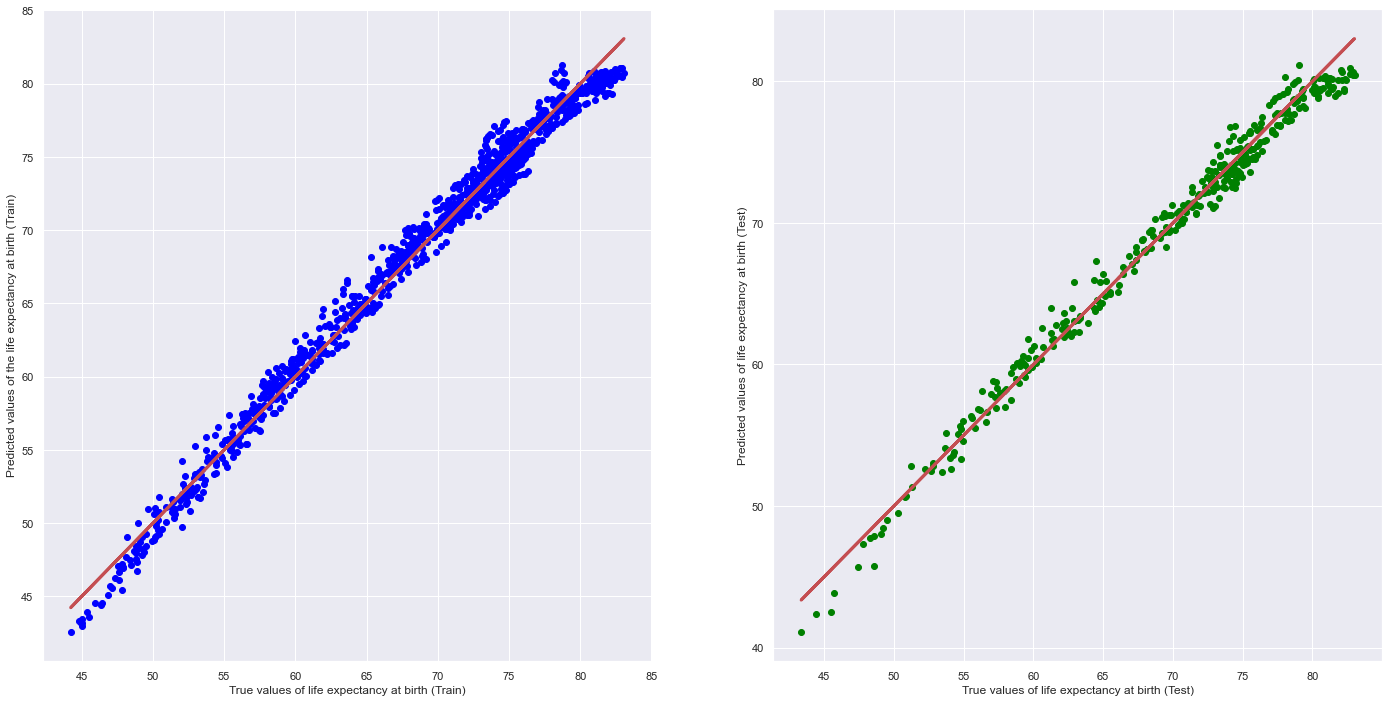

In [112]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of the life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()



In [113]:
from sklearn.metrics import mean_squared_error

print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9866374731413975
Mean Squared Error (MSE) 	: 1.1408020571782362

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.986221684345137
Mean Squared Error (MSE) 	: 1.160351585741697



### Analysing response = life_exp60 dataset

In [114]:


linreg = LinearRegression()
linreg.fit(X_train, y_train_le60) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



Intercept of Regression: b =  [32.81367257]



Predictors  Coefficients
0                adult_mort_rate    -16.976822
2               age1-4_mort_rate    -16.885882
1               infant_mort_rate     -9.550940
19               region_Americas      1.297873
20  region_Eastern Mediterranean     -0.968500
22        region_South-East Asia      0.869072
18                 region_Africa     -0.643091
4                            bmi     -0.459512
21                 region_Europe     -0.350889
14                        gghe-d      0.320448
23        region_Western Pacific     -0.204466
17                       une_hiv      0.168206
15                       che_gdp      0.093201
6                 age5-19obesity      0.082911
5                age5-19thinness     -0.069354
3                        alcohol      0.021568
9                          polio     -0.012998
11                   basic_water      0.010900
10                    diphtheria     -0.008951
12                       doctors     -0.008382
8                        measles      0.002653
7                      hepatitis      0.000362
13                    gni_capita      0.000018
16                       une_pop     -0.000002

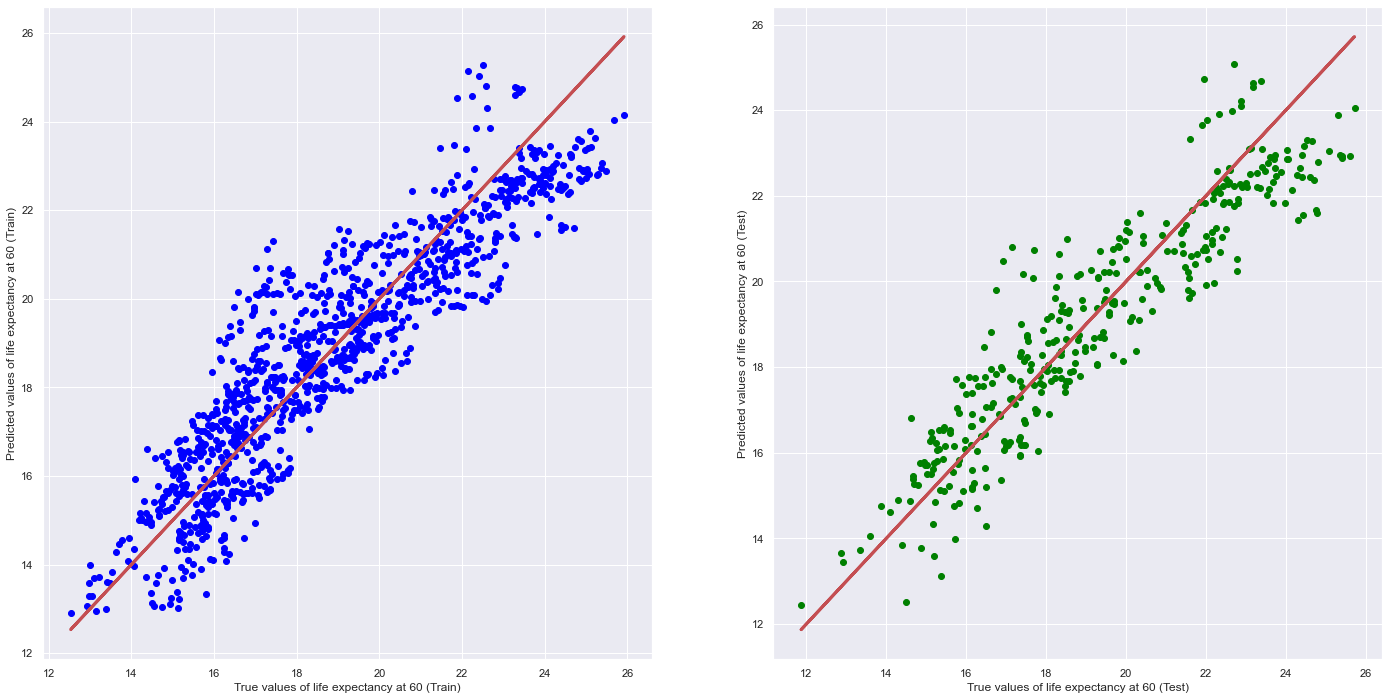

----------For Response = life_exp60----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8249821629018471
Mean Squared Error (MSE) 	: 1.4823846611369116

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8488650611391308
Mean Squared Error (MSE) 	: 1.4126724368439691



In [115]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()


print("----------For Response = life_exp60----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

### Analysing with only top 3 predictors

In [116]:
y = pd.DataFrame(clean_ml_df['life_expect'])
X = pd.DataFrame(clean_ml_df[['age1-4_mort_rate','adult_mort_rate','infant_mort_rate']])

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Train Set :", y_train_3.shape, X_train_3.shape)
print("Test Set  :", y_test_3.shape, X_test_3.shape)

linreg = LinearRegression()  
linreg.fit(X_train_3, y_train_3) 

print()
print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key=abs)

Train Set : (1091, 1) (1091, 3)
Test Set  : (364, 1) (364, 3)

Intercept of Regression: b =  [82.23140887]



Predictors  Coefficients
0   adult_mort_rate   -181.162589
2  age1-4_mort_rate   -121.999678
1  infant_mort_rate    -43.901281

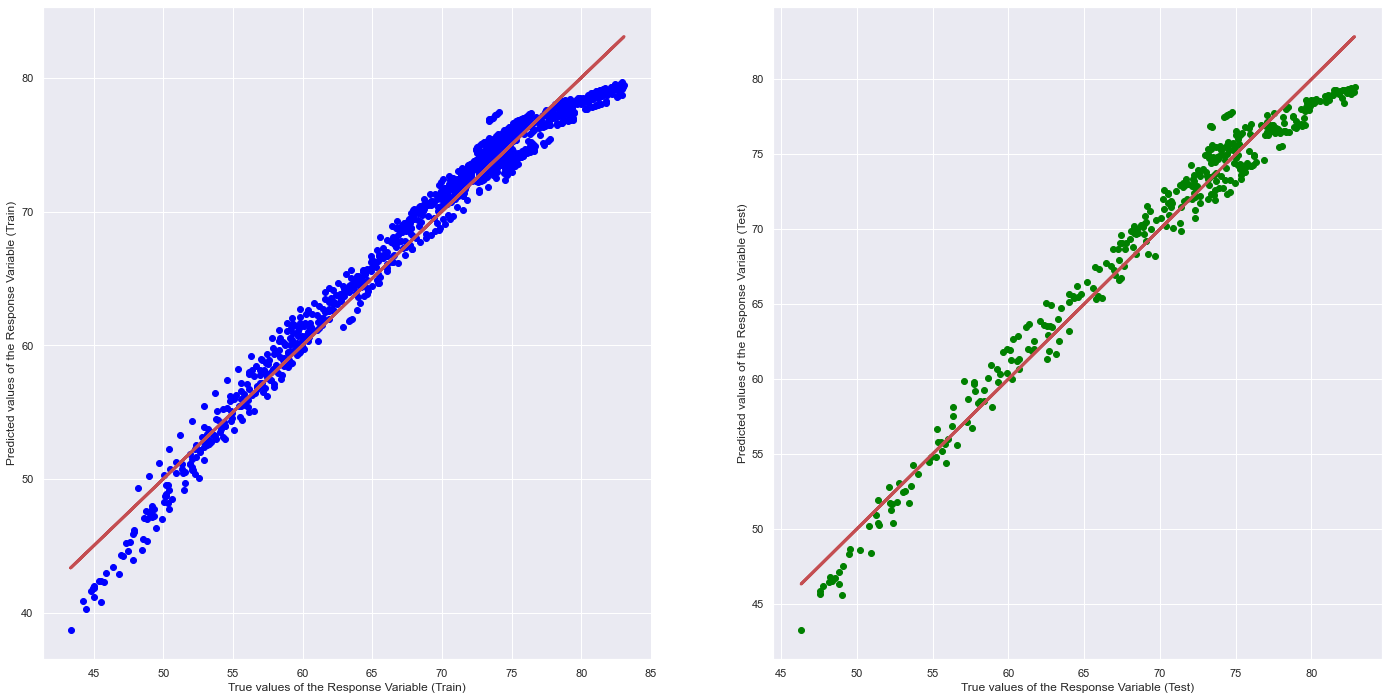

In [117]:
y_train_pred = linreg.predict(X_train_3)
y_test_pred = linreg.predict(X_test_3)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_3, y_train_pred, color = "blue")
axes[0].plot(y_train_3, y_train_3, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_3, y_test_pred, color = "green")
axes[1].plot(y_test_3, y_test_3, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [118]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_3, y_train_3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_3, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_3, y_test_3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_3, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9734505361878258
Mean Squared Error (MSE) 	: 2.2745703349448823

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9709165566671669
Mean Squared Error (MSE) 	: 2.4321901441188682



## Model 2: RandomForestRegressor

### Analysing response = life_expect dataset

In [119]:
print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 24)
Test Set for y=life_expect: (364, 1) (364, 24)

Train Set for y=life_exp60: (1091, 1) (1091, 24)
Test Set for y=life_exp60: (364, 1) (364, 24)


In [147]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  
              'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

RandomForestRegressor(max_depth=10, n_estimators=700, random_state=0)
0.9944183623887414


In [171]:
#using best hyperparameter

rfr = RandomForestRegressor(n_estimators = 700,  max_depth = 10, random_state=0)     

# Fit Random Forest on Train Data
rfr.fit(X_train, y_train_le['life_expect'].ravel())


RandomForestRegressor(max_depth=10, n_estimators=700, random_state=0)

In [172]:
rfr.feature_importances_

array([1.88237359e-01, 2.06660910e-02, 7.68139037e-01, 9.90792783e-04,
       6.12681587e-04, 1.15984784e-02, 1.16363785e-03, 2.59916161e-04,
       3.24855658e-04, 2.49516373e-04, 3.18628952e-04, 1.50136439e-03,
       4.44371642e-04, 9.89423993e-04, 6.49638371e-04, 4.73001244e-04,
       1.22891337e-03, 7.43006796e-04, 2.11936055e-05, 1.00046288e-03,
       2.81398041e-04, 2.42382777e-05, 2.35013053e-05, 5.84912245e-05])

Text(0.5, 0, 'Random Forest Feature Importance')

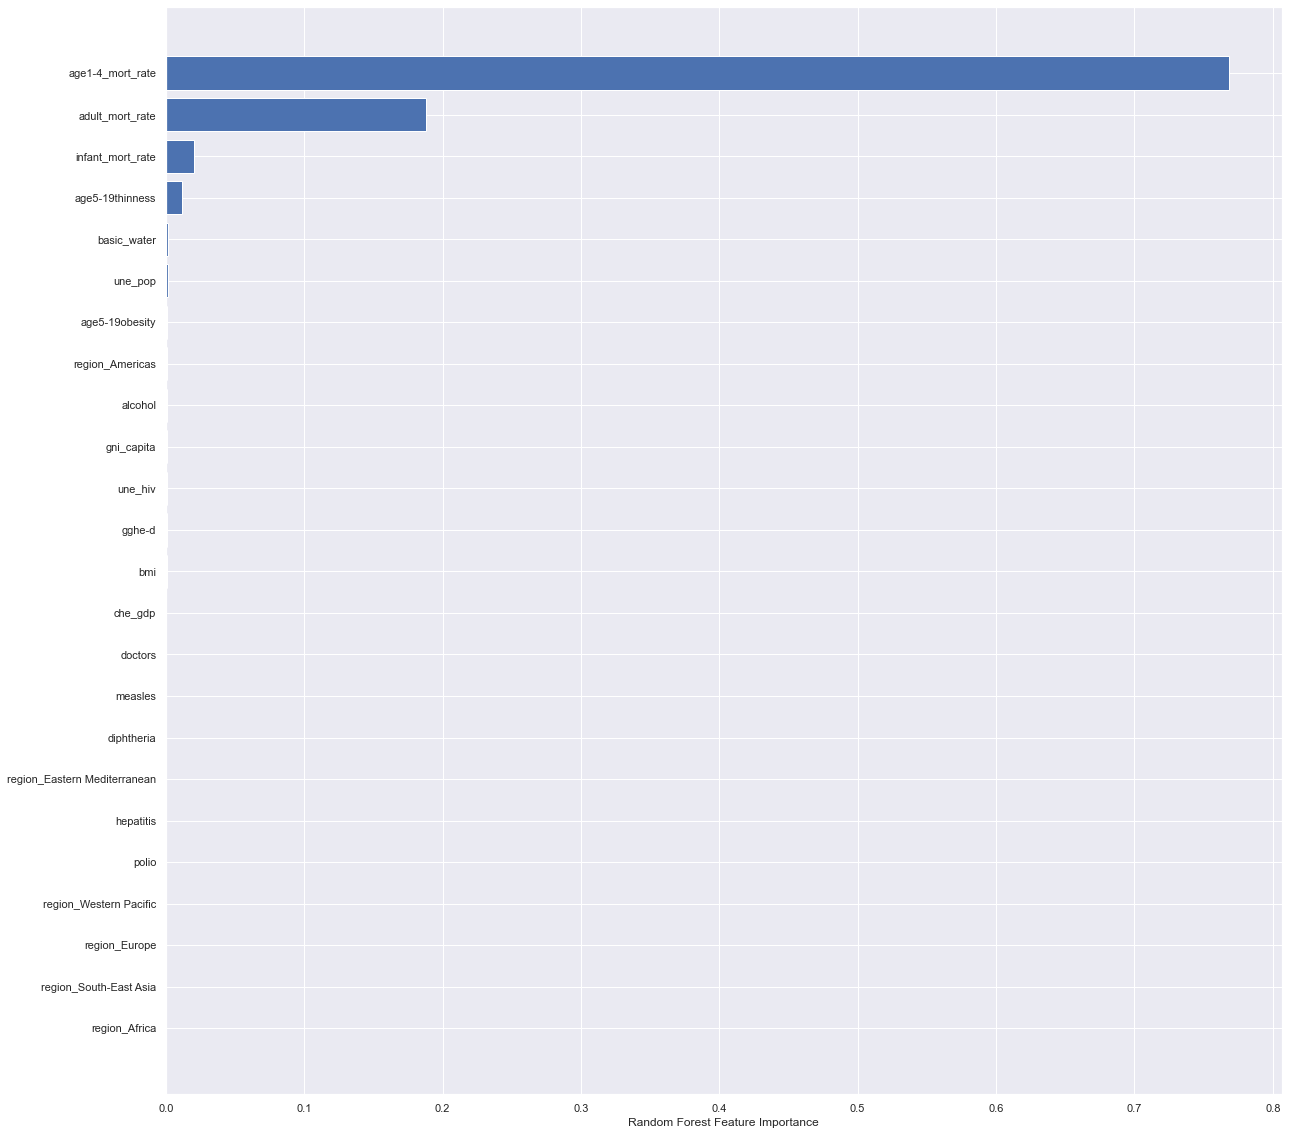

In [173]:
plt.figure(figsize=(20,20))
i = rfr.feature_importances_.argsort()
plt.barh(X_train.columns[i], rfr.feature_importances_[i])
plt.xlabel("Random Forest Feature Importance")

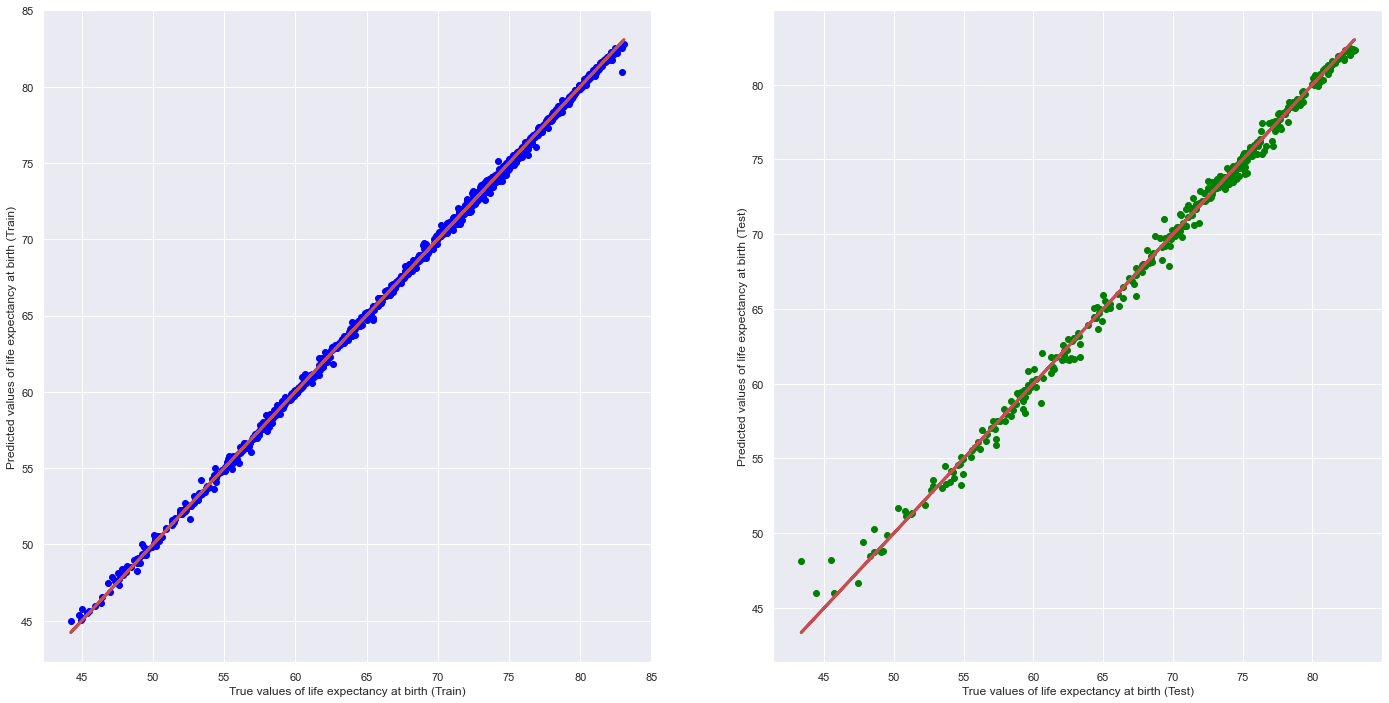

In [157]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [158]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9993377629956113
Mean Squared Error (MSE) 	: 0.05653731101463015

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.995701680377548
Mean Squared Error (MSE) 	: 0.3619863352583631



### Analysing response = life_exp60 dataset

In [159]:
estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))


RandomForestRegressor(max_depth=10, n_estimators=900, random_state=0)
0.967577706620692


In [174]:
rfr = RandomForestRegressor(n_estimators = 1000,  max_depth = 8, random_state=0)     

rfr.fit(X_train, y_train_le60['life_exp60'].ravel())

RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=0)

In [175]:
rfr.feature_importances_

array([6.40803823e-01, 7.95561816e-03, 2.18151370e-02, 1.05986176e-02,
       8.09289624e-03, 1.79800953e-01, 7.41553947e-03, 1.38551941e-03,
       1.24333704e-03, 1.21307008e-03, 1.08823033e-03, 1.14139971e-02,
       5.06243093e-03, 1.57334086e-02, 7.16432841e-03, 3.82086125e-03,
       1.93147350e-02, 1.46144852e-02, 9.73347568e-05, 3.61086579e-02,
       5.11946013e-05, 3.21514361e-04, 3.09008567e-03, 1.79422490e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

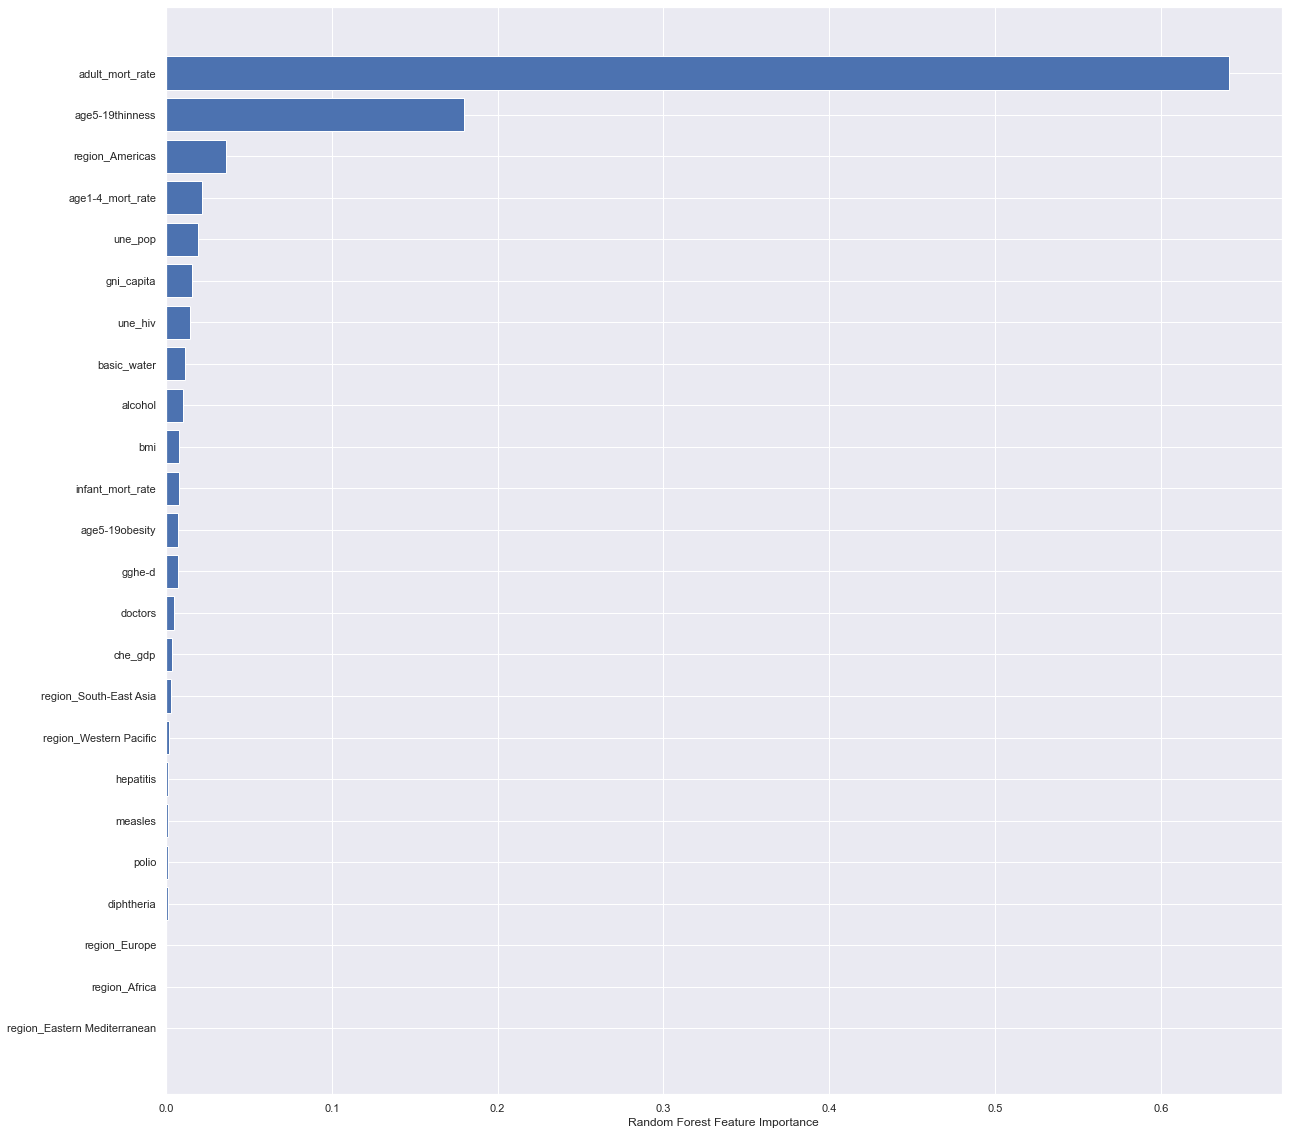

In [176]:
plt.figure(figsize=(20,20))
i = rfr.feature_importances_.argsort()
plt.barh(X_train.columns[i], rfr.feature_importances_[i])
plt.xlabel("Random Forest Feature Importance")

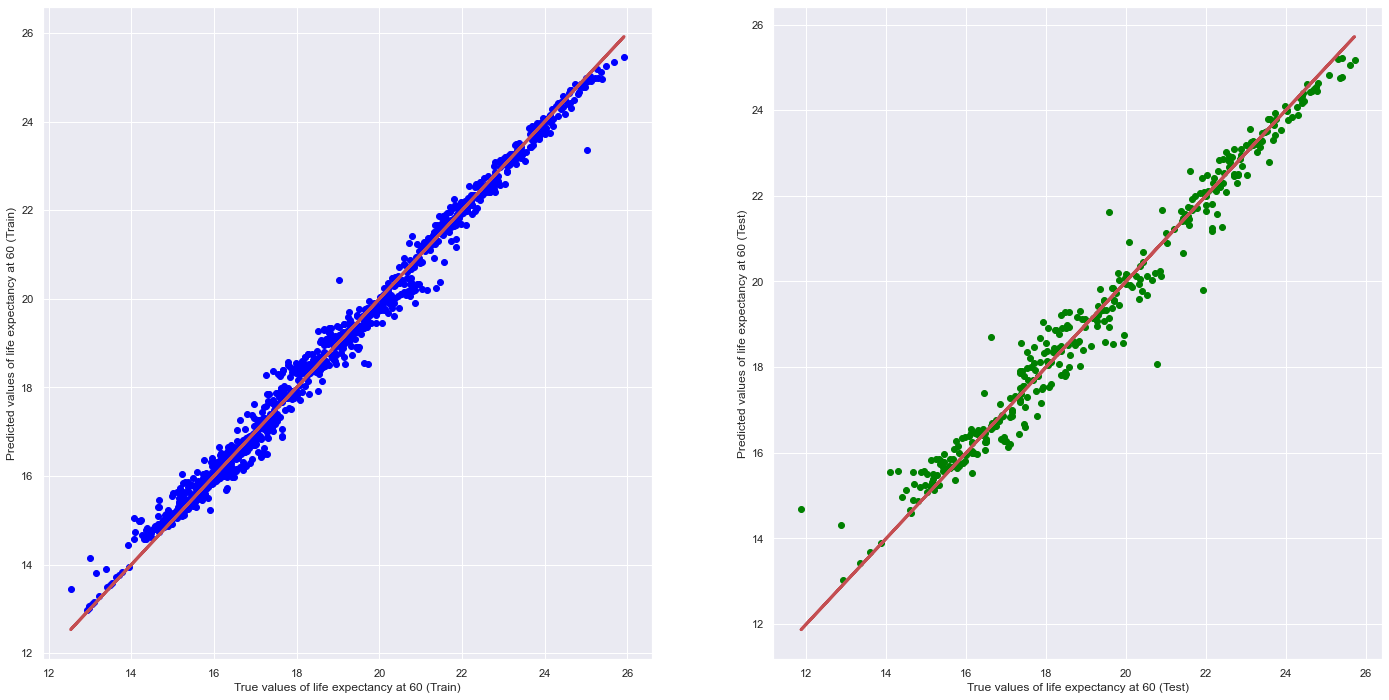

In [127]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [128]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

-----------For Response = life_exp60-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9902340955810426
Mean Squared Error (MSE) 	: 0.08271629425218407

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9728327476397113
Mean Squared Error (MSE) 	: 0.25393485373686064



## Model 3: Gradient Boosting Regressor

### Analysing response = life_expect dataset

In [129]:
print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 24)
Test Set for y=life_expect: (364, 1) (364, 24)

Train Set for y=life_exp60: (1091, 1) (1091, 24)
Test Set for y=life_exp60: (364, 1) (364, 24)


In [130]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

GradientBoostingRegressor(max_depth=5, n_estimators=90, random_state=0)
0.9953711381677991


In [183]:
gbr = GradientBoostingRegressor(n_estimators = 90,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le['life_expect'].ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=90, random_state=0)

In [184]:
gbr.feature_importances_

array([2.22022922e-01, 2.87703343e-02, 7.29443212e-01, 7.23476993e-04,
       3.74388537e-04, 9.56046480e-03, 9.14415567e-04, 8.56113640e-05,
       1.20833019e-04, 7.22391339e-05, 1.16642869e-04, 1.46498130e-03,
       2.02163108e-04, 1.00179317e-03, 5.25634076e-04, 1.56803390e-04,
       1.09137341e-03, 9.29425634e-04, 3.91043437e-08, 1.47491609e-03,
       6.31345391e-04, 4.85056118e-05, 1.14253273e-04, 1.54225981e-04])

Text(0.5, 0, 'Gradient Boosting Feature Importance')

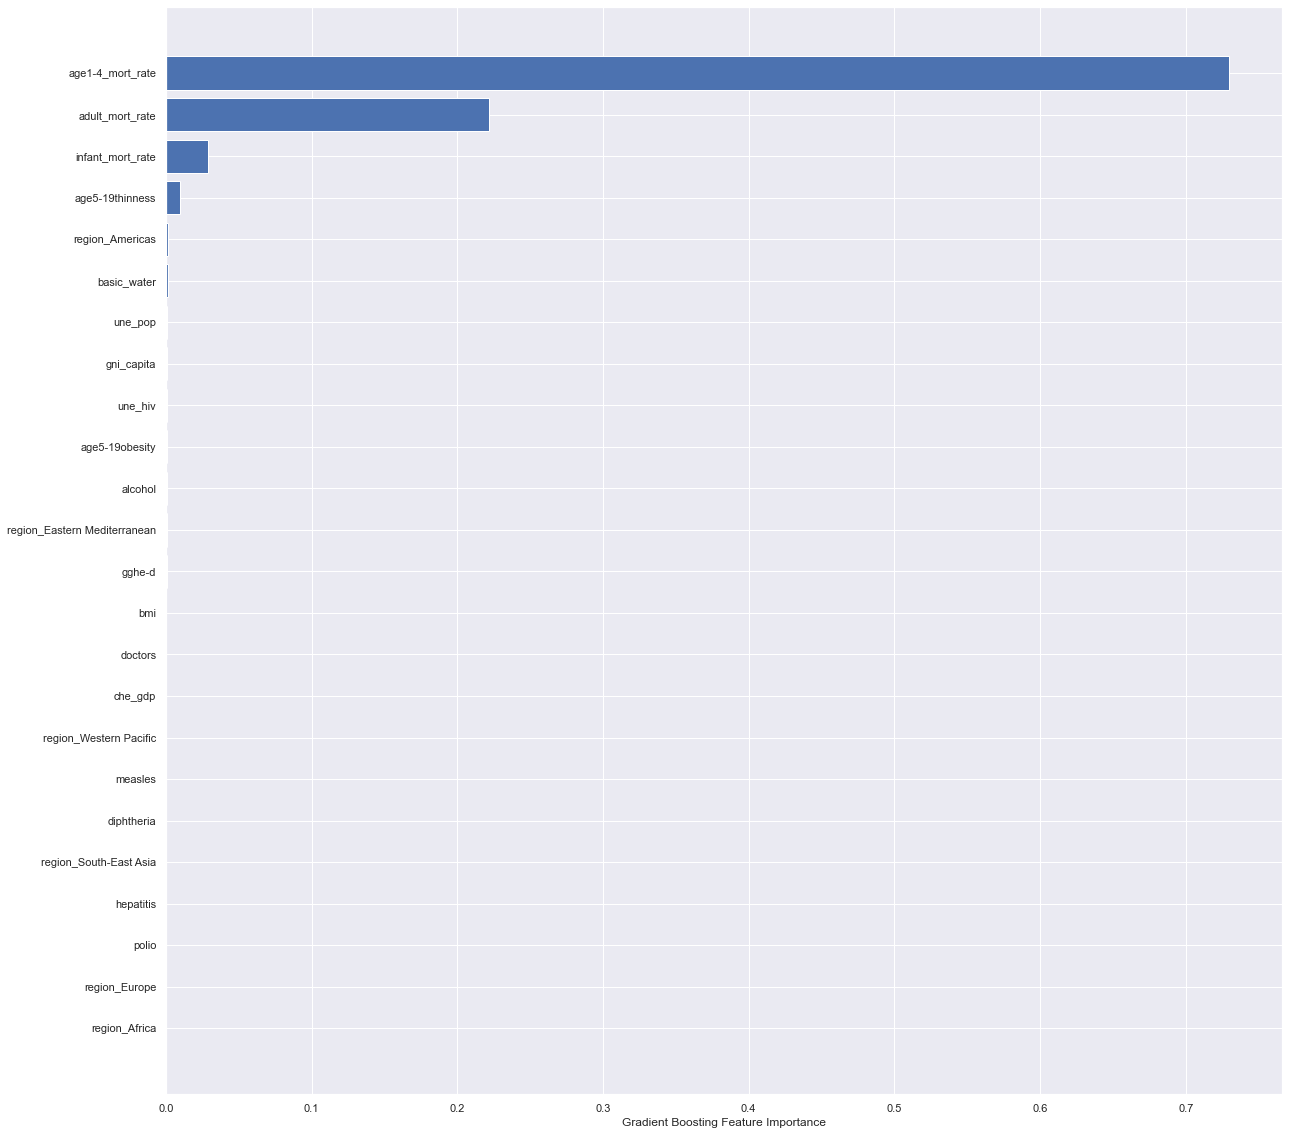

In [185]:
plt.figure(figsize=(20,20))
i = gbr.feature_importances_.argsort()
plt.barh(X_train.columns[i], gbr.feature_importances_[i])
plt.xlabel("Gradient Boosting Feature Importance")

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

feature_importance = gbr.feature_importances_
index = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")



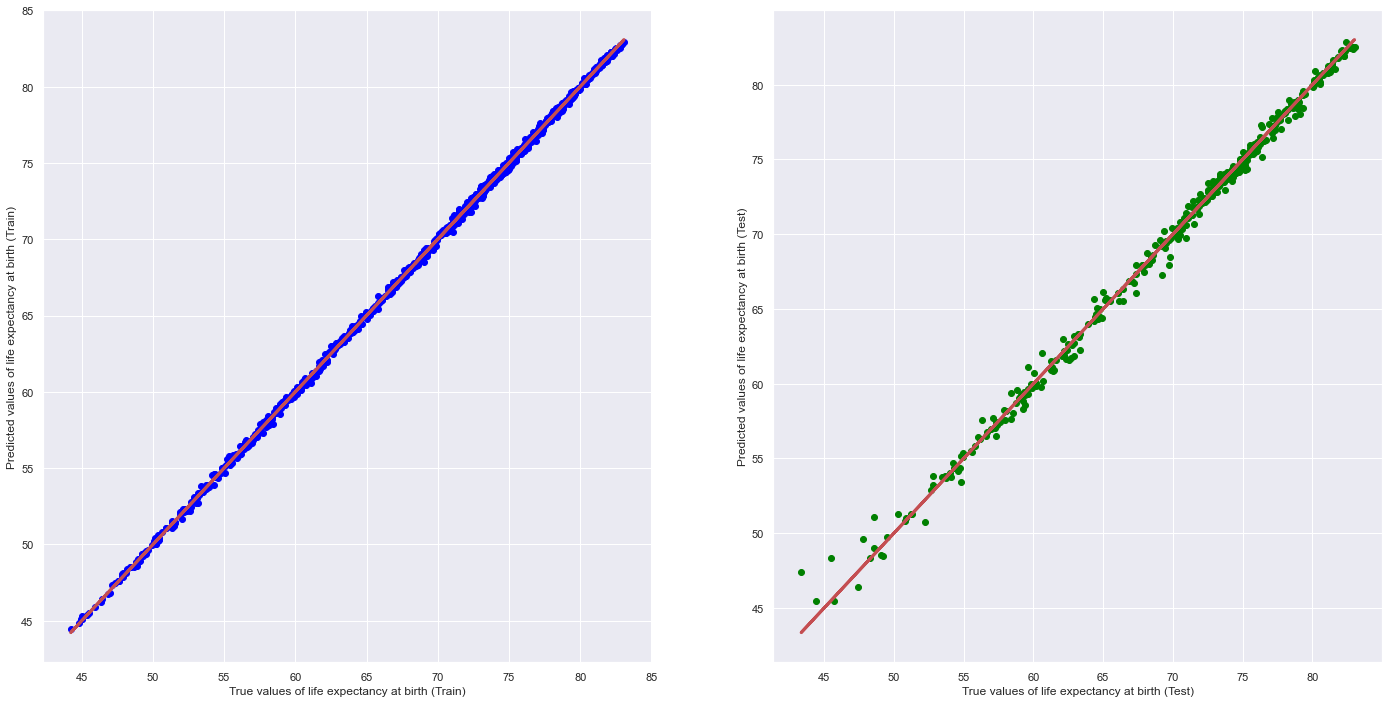

In [162]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [163]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9996686862446134
Mean Squared Error (MSE) 	: 0.028285324902693344

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9962427864287873
Mean Squared Error (MSE) 	: 0.3164166676489387



### Analysing response = life_exp60 dataset

In [143]:
estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

GradientBoostingRegressor(max_depth=7, n_estimators=90, random_state=0)
0.9726537743754916


In [187]:
gbr = GradientBoostingRegressor(n_estimators = 90,  max_depth = 7, random_state=0)     

gbr.fit(X_train, y_train_le60['life_exp60'].ravel())

GradientBoostingRegressor(max_depth=7, n_estimators=90, random_state=0)

In [188]:
gbr.feature_importances_

array([6.44161338e-01, 7.09588806e-03, 1.22786608e-02, 8.30564919e-03,
       1.05952812e-02, 1.68692654e-01, 8.58303821e-03, 1.47115612e-03,
       9.38827382e-04, 1.00384094e-03, 1.39478193e-03, 1.49040946e-02,
       6.09285912e-03, 2.29255769e-02, 6.95626692e-03, 4.10516772e-03,
       2.26764122e-02, 1.97184027e-02, 8.70381571e-05, 3.57040626e-02,
       2.06103005e-04, 1.10161642e-03, 8.76444080e-04, 1.24839643e-04])

Text(0.5, 0, 'Gradient Boosting Feature Importance')

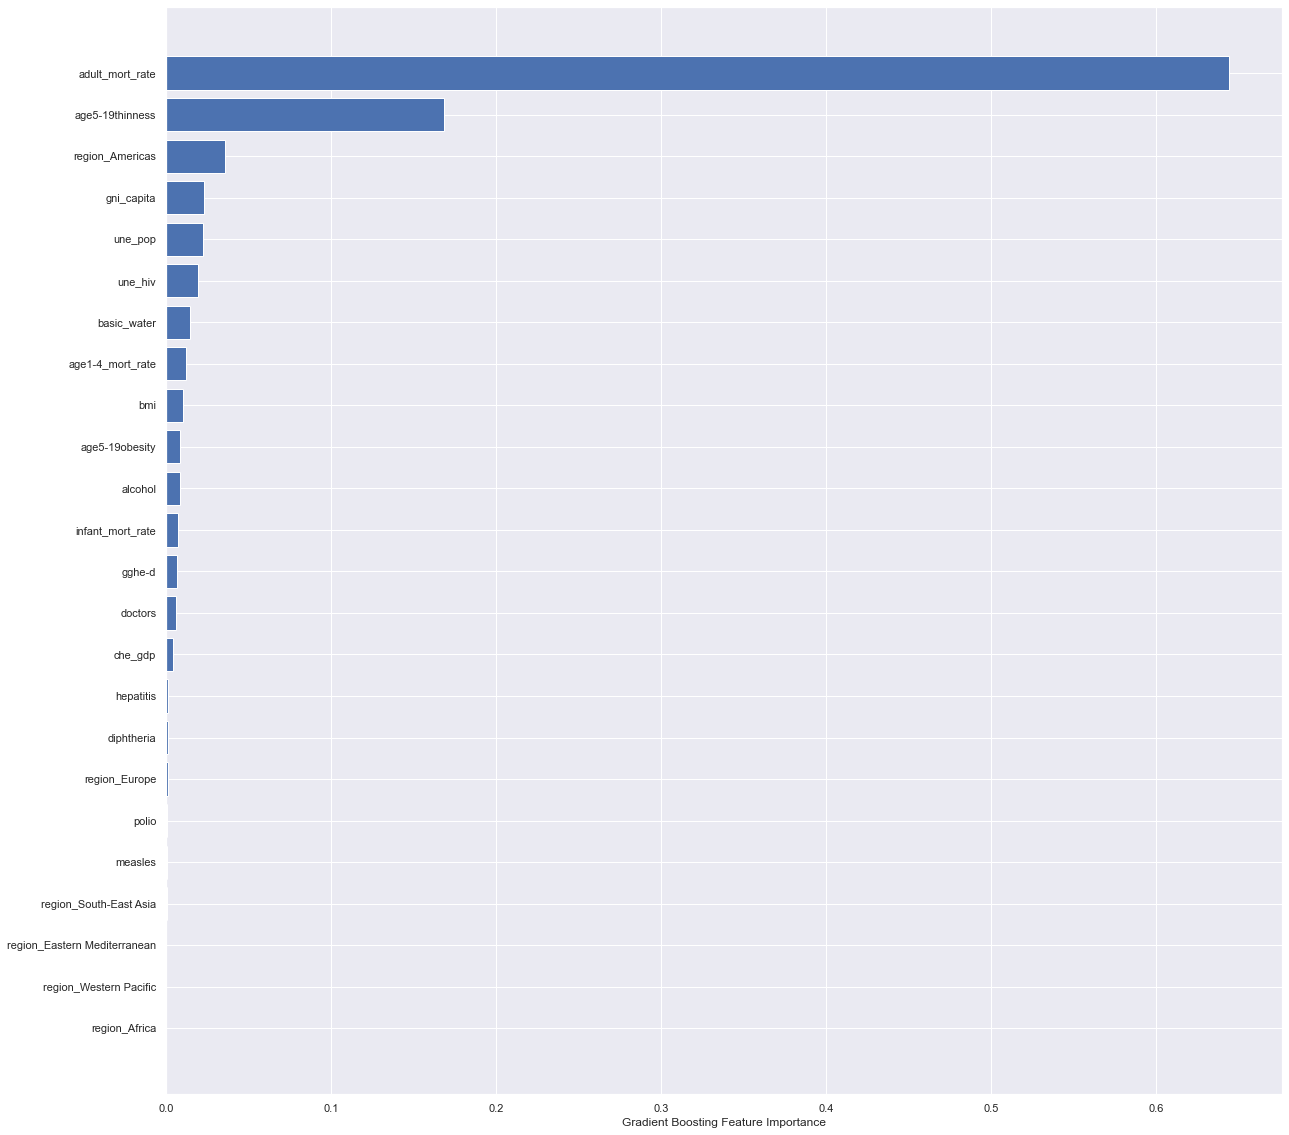

In [193]:
plt.figure(figsize=(20,20))
i = gbr.feature_importances_.argsort()
plt.barh(X_train.columns[i], gbr.feature_importances_[i])
plt.xlabel("Gradient Boosting Feature Importance")

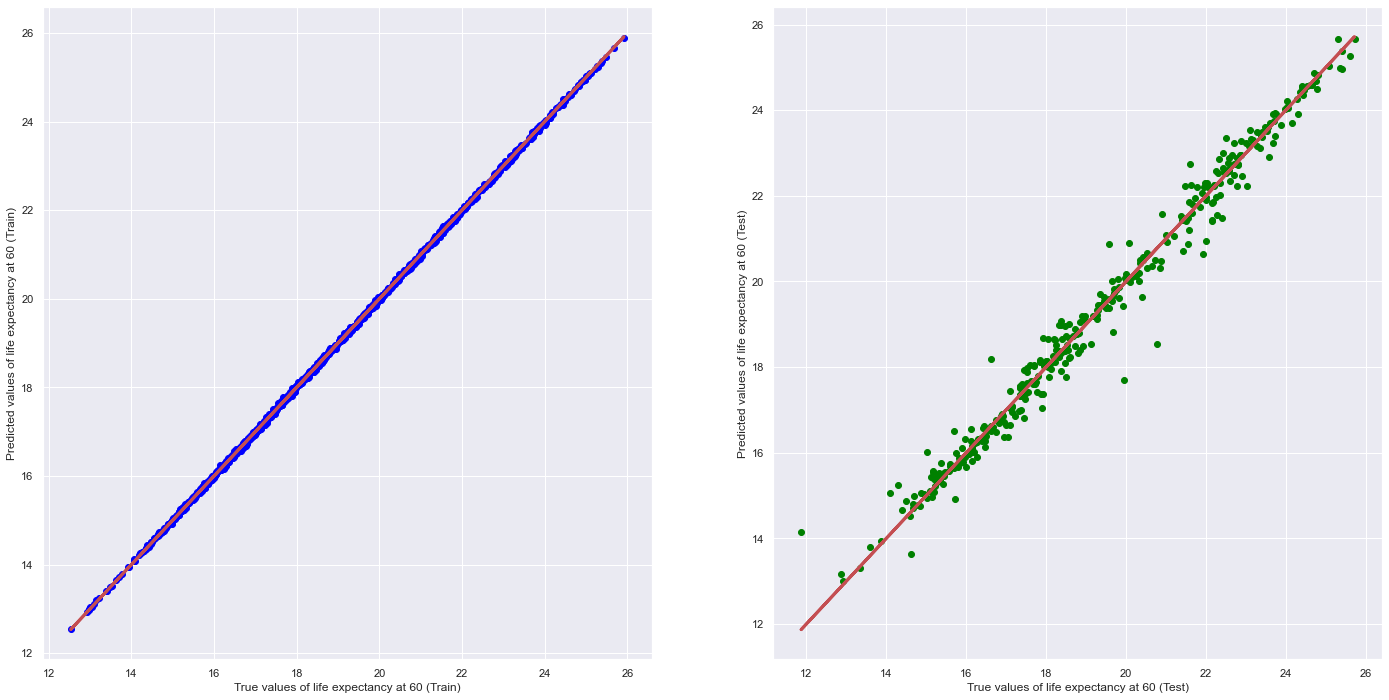

In [165]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [166]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

-----------For Response = life_exp60-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9998754309720189
Mean Squared Error (MSE) 	: 0.0010550879807084874

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9829594086246475
Mean Squared Error (MSE) 	: 0.15928000451068608



## Regional

In [ ]:
regionList = [Africa_df, Europe_df, WP_df, SEA_df, EM_df, Americas_df]


In [303]:
gbrList = []
for region in regionList:
    area = region['region'].iloc[0]
    print("----------" , area,"----------")
    region = region.drop(['year','country','region'],axis=1).dropna()
    y_le_region = pd.DataFrame(region['life_expect'])
    X_region = pd.DataFrame(region.drop(['life_expect', 'life_exp60'], axis=1))

    X_train, X_test, y_train_le, y_test_le = train_test_split(X_region, y_le_region, test_size = 0.25, random_state = 42)

    print("Train Set:", y_train_le.shape, X_train.shape)
    print("Test Set:", y_test_le.shape, X_test.shape)
    print()
    
    estimator = GradientBoostingRegressor(random_state=0) 
    param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}
    grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')
    grid.fit(X_train, y_train_le['life_expect'].ravel())

    gbr = grid.best_estimator_     
    gbr.fit(X_train, y_train_le['life_expect'].ravel())
    
    y_train_pred = gbr.predict(X_train)
    y_test_pred = gbr.predict(X_test)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
    print()

    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
    print()
    dummy = (gbr.feature_importances_ ,area)
    gbrList.append(dummy)
    print(gbr.feature_importances_)
    print()

---------- Africa ----------
Train Set: (310, 1) (310, 18)
Test Set: (104, 1) (104, 18)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9988756026472396
Mean Squared Error (MSE) 	: 0.049880130982557544

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9890622951749456
Mean Squared Error (MSE) 	: 0.47072015739489903

[4.69663112e-01 1.44857252e-01 3.74943140e-01 1.03367918e-04
 7.19417316e-04 9.77331309e-04 2.39575025e-03 2.05938229e-05
 1.35288523e-04 3.01064706e-04 2.94588685e-05 5.32508185e-04
 1.32387793e-03 2.99623510e-03 1.23287605e-04 1.21301961e-04
 3.49293960e-04 4.07718318e-04]

---------- Europe ----------
Train Set: (337, 1) (337, 18)
Test Set: (113, 1) (113, 18)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9996984092427509
Mean Squared Error (MSE) 	: 0.007209170998824327

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9895435714271774
Mean Squared Error (MSE) 	: 0.22355360931992052

[

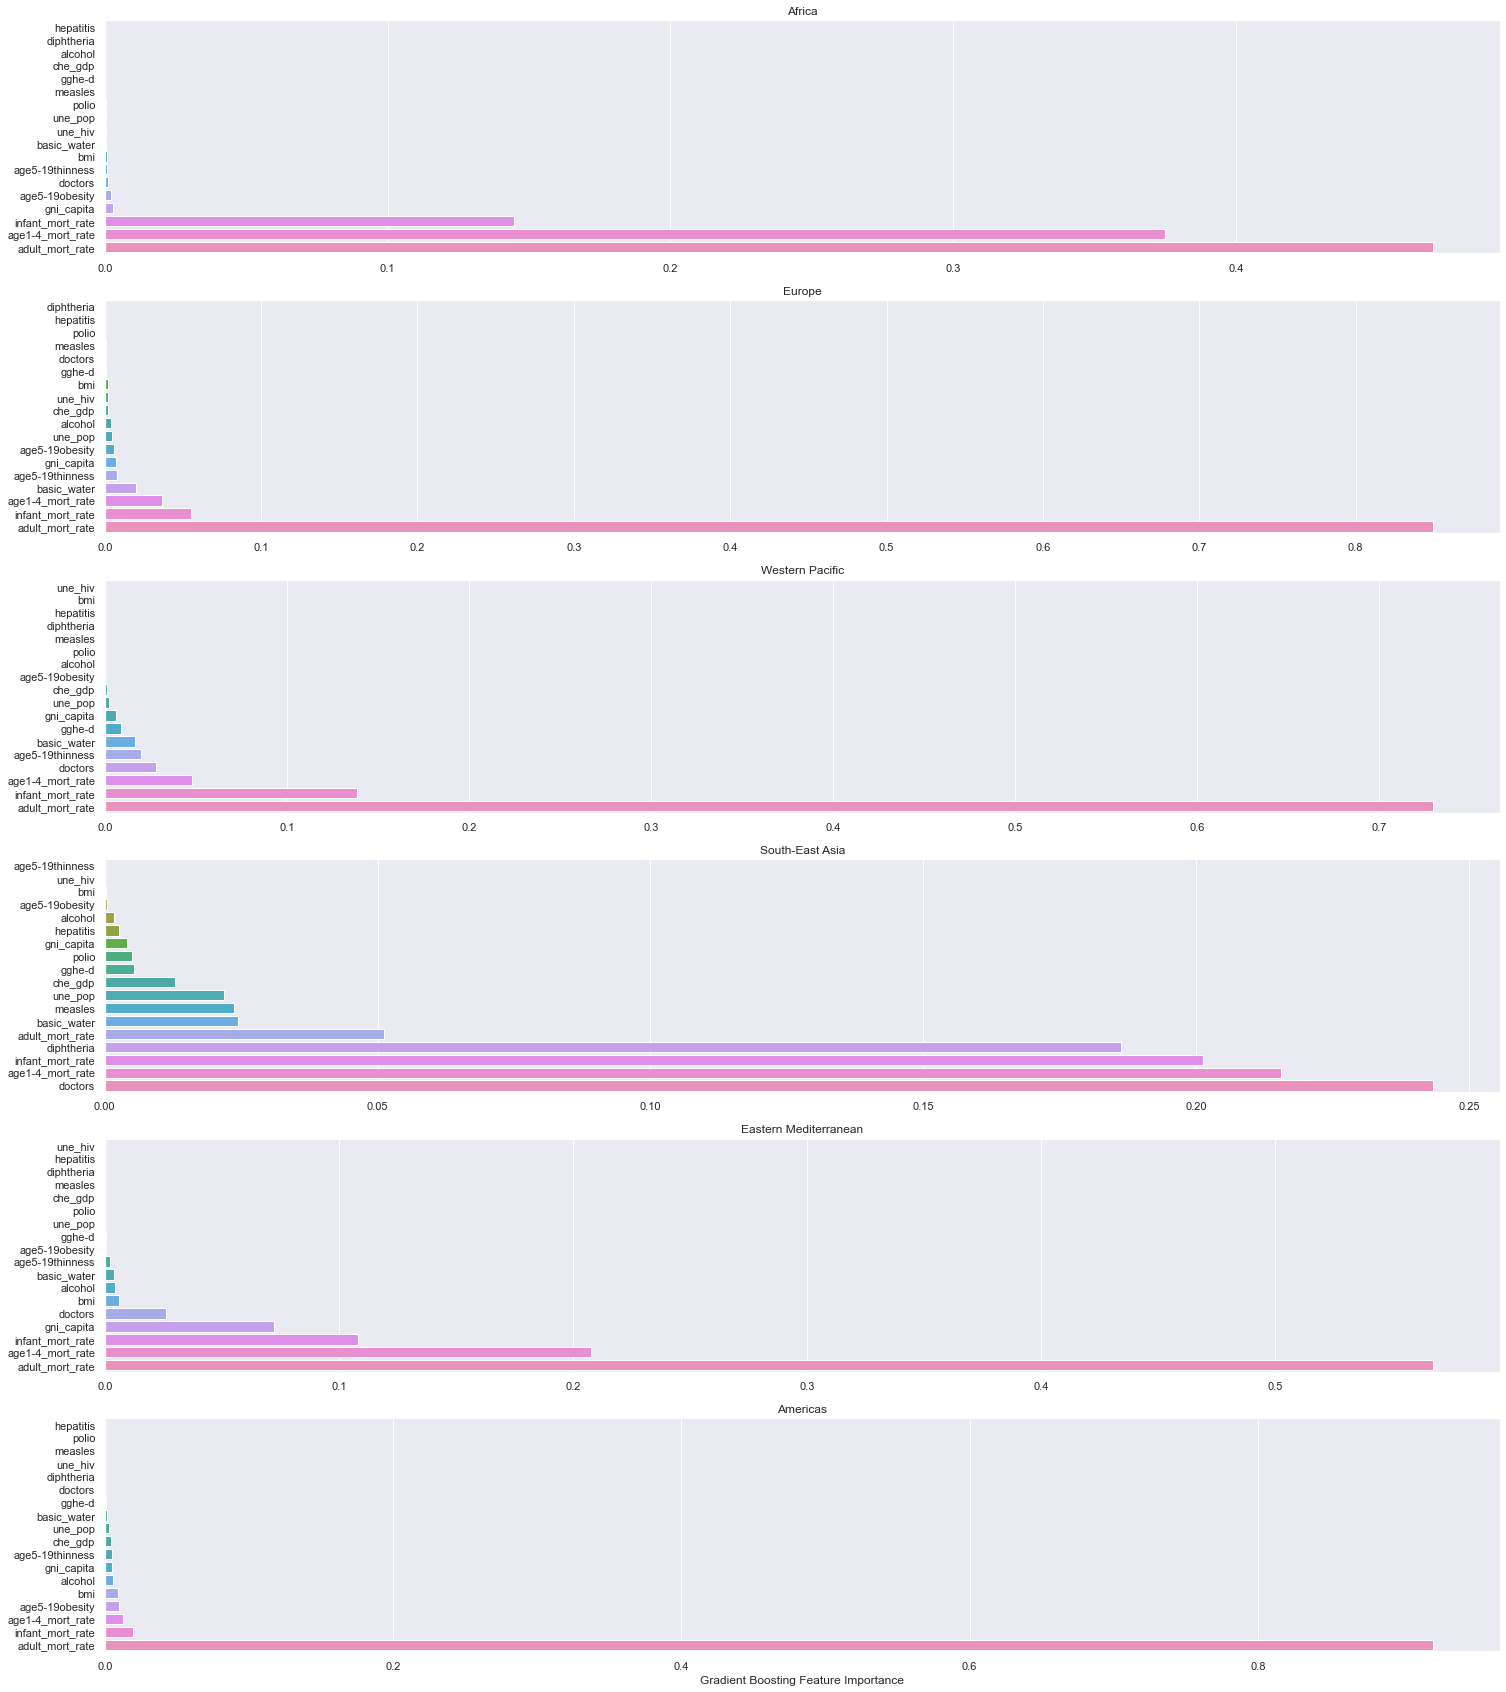

In [304]:
f,axes = plt.subplots(6,1, figsize=(25,30))
k=0

for gbr in gbrList:
    i = gbr[0].argsort()
    sb.barplot(y=X_train.columns[i], x=gbr[0][i], ax = axes[k]).set(title = gbr[1])
    plt.xlabel("Gradient Boosting Feature Importance")
    k+=1